<a href="https://colab.research.google.com/github/Trizzole/HelloAI/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [2]:
import torch
import time
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# create and train a pytorch digit classifier
# source: chatgpt with the prompt "create a pytorch mnist digit classifier"
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Set device to either CUDA or CPU
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda")

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv1(x), 2))
        x = nn.functional.relu(nn.functional.max_pool2d(self.dropout(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

# Load the MNIST dataset and apply transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_set = datasets.MNIST('../data', train=True, download=True, transform=transform)
test_set = datasets.MNIST('../data', train=False, download=True, transform=transform)

# Set batch size and create data loaders
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Create an instance of the model and send it to the device
model = Net().to(device)

# Define the optimizer and loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

# Train the model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.317917
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.565521
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.753494
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.541730
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.388594
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.351650
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.340901
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.377373
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.192306
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.448165
Test set: Average loss: 0.0026, Accuracy: 9489/10000 (95%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.205742
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.238678
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.239001
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.484150
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.211253
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.326258
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.111415
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.137992
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.231887
Tr

Epoch [1/100] Batch [1/469] Discriminator Loss: 1.3620 Generator Loss: 0.7390
Epoch [1/100] Batch [101/469] Discriminator Loss: 0.2343 Generator Loss: 2.0213
Epoch [1/100] Batch [201/469] Discriminator Loss: 0.7719 Generator Loss: 2.4211
Epoch [1/100] Batch [301/469] Discriminator Loss: 1.0625 Generator Loss: 0.6930
Epoch [1/100] Batch [401/469] Discriminator Loss: 1.2199 Generator Loss: 0.5701


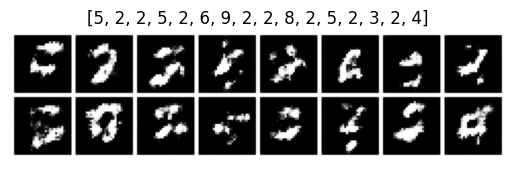

average prediction confidence over 1000 predictions: 0.4264458119869232
cumulative prediction counts: [28, 28, 263, 226, 35, 92, 13, 128, 126, 61]
epoch time: 17.792996168136597, total time: 17.792996168136597
Epoch [2/100] Batch [1/469] Discriminator Loss: 1.0494 Generator Loss: 0.6976
Epoch [2/100] Batch [101/469] Discriminator Loss: 1.2126 Generator Loss: 1.0005
Epoch [2/100] Batch [201/469] Discriminator Loss: 1.1992 Generator Loss: 1.0304
Epoch [2/100] Batch [301/469] Discriminator Loss: 1.0994 Generator Loss: 0.8688
Epoch [2/100] Batch [401/469] Discriminator Loss: 1.1300 Generator Loss: 1.1353


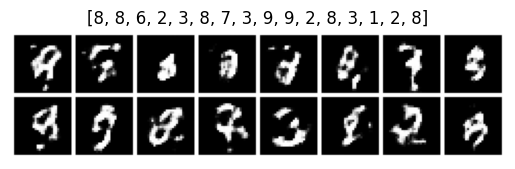

average prediction confidence over 1000 predictions: 0.4624914228916168
cumulative prediction counts: [104, 43, 421, 501, 67, 156, 38, 158, 256, 256]
epoch time: 16.810590267181396, total time: 34.60358643531799
Epoch [3/100] Batch [1/469] Discriminator Loss: 1.0642 Generator Loss: 0.9933
Epoch [3/100] Batch [101/469] Discriminator Loss: 1.1621 Generator Loss: 1.2669
Epoch [3/100] Batch [201/469] Discriminator Loss: 1.1012 Generator Loss: 1.2732
Epoch [3/100] Batch [301/469] Discriminator Loss: 1.0020 Generator Loss: 1.3380
Epoch [3/100] Batch [401/469] Discriminator Loss: 0.9171 Generator Loss: 1.0136


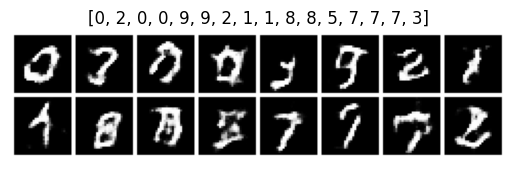

average prediction confidence over 1000 predictions: 0.48789241909980774
cumulative prediction counts: [157, 77, 559, 724, 141, 230, 81, 252, 374, 405]
epoch time: 21.976780891418457, total time: 56.58036732673645
Epoch [4/100] Batch [1/469] Discriminator Loss: 0.9920 Generator Loss: 0.9483
Epoch [4/100] Batch [101/469] Discriminator Loss: 1.0352 Generator Loss: 1.3260
Epoch [4/100] Batch [201/469] Discriminator Loss: 1.1611 Generator Loss: 0.5610
Epoch [4/100] Batch [301/469] Discriminator Loss: 1.0582 Generator Loss: 0.6634
Epoch [4/100] Batch [401/469] Discriminator Loss: 1.1823 Generator Loss: 0.5109


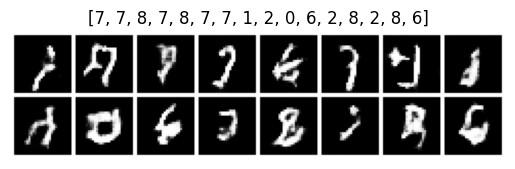

average prediction confidence over 1000 predictions: 0.5075937509536743
cumulative prediction counts: [222, 153, 700, 862, 190, 279, 139, 368, 551, 536]
epoch time: 17.410070419311523, total time: 73.99043774604797
Epoch [5/100] Batch [1/469] Discriminator Loss: 1.0402 Generator Loss: 1.0411
Epoch [5/100] Batch [101/469] Discriminator Loss: 1.1477 Generator Loss: 1.2852
Epoch [5/100] Batch [201/469] Discriminator Loss: 1.2385 Generator Loss: 1.4554
Epoch [5/100] Batch [301/469] Discriminator Loss: 1.1829 Generator Loss: 0.7486
Epoch [5/100] Batch [401/469] Discriminator Loss: 1.0894 Generator Loss: 0.8670


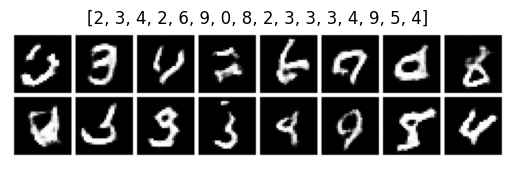

average prediction confidence over 1000 predictions: 0.5303410291671753
cumulative prediction counts: [325, 217, 810, 996, 256, 340, 195, 450, 696, 715]
epoch time: 16.92389440536499, total time: 90.91433215141296
Epoch [6/100] Batch [1/469] Discriminator Loss: 1.1211 Generator Loss: 0.7587
Epoch [6/100] Batch [101/469] Discriminator Loss: 1.1855 Generator Loss: 0.5590
Epoch [6/100] Batch [201/469] Discriminator Loss: 1.1617 Generator Loss: 0.6365
Epoch [6/100] Batch [301/469] Discriminator Loss: 1.0711 Generator Loss: 0.9677
Epoch [6/100] Batch [401/469] Discriminator Loss: 1.0857 Generator Loss: 0.9274


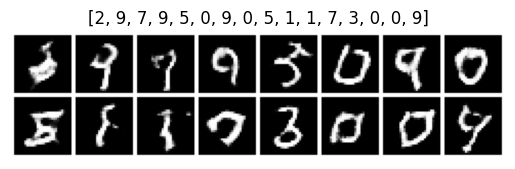

average prediction confidence over 1000 predictions: 0.5329271554946899
cumulative prediction counts: [416, 286, 938, 1125, 316, 415, 244, 544, 809, 907]
epoch time: 16.706337928771973, total time: 107.62067008018494
Epoch [7/100] Batch [1/469] Discriminator Loss: 1.1610 Generator Loss: 1.2787
Epoch [7/100] Batch [101/469] Discriminator Loss: 1.1236 Generator Loss: 1.1141
Epoch [7/100] Batch [201/469] Discriminator Loss: 1.0392 Generator Loss: 1.2540
Epoch [7/100] Batch [301/469] Discriminator Loss: 1.0510 Generator Loss: 1.1164
Epoch [7/100] Batch [401/469] Discriminator Loss: 1.1831 Generator Loss: 0.5997


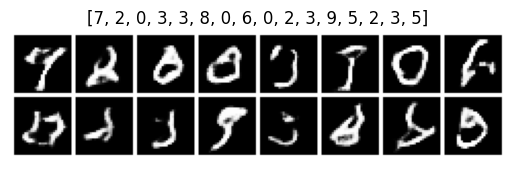

average prediction confidence over 1000 predictions: 0.5455573201179504
cumulative prediction counts: [504, 348, 1074, 1270, 370, 482, 298, 643, 930, 1081]
epoch time: 18.560623168945312, total time: 126.18129324913025
Epoch [8/100] Batch [1/469] Discriminator Loss: 1.0497 Generator Loss: 0.9823
Epoch [8/100] Batch [101/469] Discriminator Loss: 1.1039 Generator Loss: 1.0929
Epoch [8/100] Batch [201/469] Discriminator Loss: 1.0358 Generator Loss: 1.1328
Epoch [8/100] Batch [301/469] Discriminator Loss: 1.0392 Generator Loss: 0.9216
Epoch [8/100] Batch [401/469] Discriminator Loss: 0.9835 Generator Loss: 1.0224


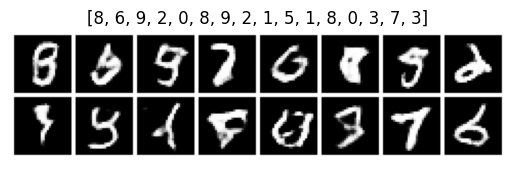

average prediction confidence over 1000 predictions: 0.5442982316017151
cumulative prediction counts: [581, 429, 1207, 1425, 433, 562, 342, 735, 1049, 1237]
epoch time: 16.838560342788696, total time: 143.01985359191895
Epoch [9/100] Batch [1/469] Discriminator Loss: 1.0902 Generator Loss: 1.2024
Epoch [9/100] Batch [101/469] Discriminator Loss: 1.0317 Generator Loss: 1.1719
Epoch [9/100] Batch [201/469] Discriminator Loss: 1.1369 Generator Loss: 1.4342
Epoch [9/100] Batch [301/469] Discriminator Loss: 0.9655 Generator Loss: 0.8642
Epoch [9/100] Batch [401/469] Discriminator Loss: 1.0317 Generator Loss: 0.9659


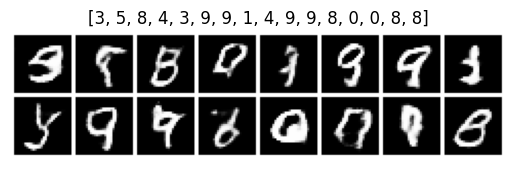

average prediction confidence over 1000 predictions: 0.5528389811515808
cumulative prediction counts: [665, 493, 1336, 1553, 491, 652, 380, 827, 1172, 1431]
epoch time: 16.96231198310852, total time: 159.98216557502747
Epoch [10/100] Batch [1/469] Discriminator Loss: 0.9759 Generator Loss: 0.9478
Epoch [10/100] Batch [101/469] Discriminator Loss: 1.0473 Generator Loss: 0.8682
Epoch [10/100] Batch [201/469] Discriminator Loss: 1.0078 Generator Loss: 1.1749
Epoch [10/100] Batch [301/469] Discriminator Loss: 1.0455 Generator Loss: 0.8348
Epoch [10/100] Batch [401/469] Discriminator Loss: 1.0379 Generator Loss: 1.0552


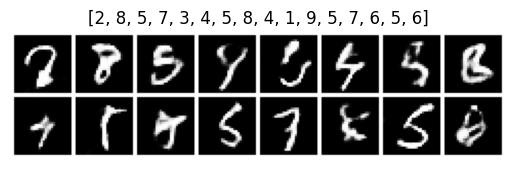

average prediction confidence over 1000 predictions: 0.5521007180213928
cumulative prediction counts: [751, 550, 1441, 1689, 545, 745, 438, 922, 1299, 1620]
epoch time: 17.12465190887451, total time: 177.10681748390198
Epoch [11/100] Batch [1/469] Discriminator Loss: 1.0687 Generator Loss: 1.4898
Epoch [11/100] Batch [101/469] Discriminator Loss: 1.0465 Generator Loss: 0.8628
Epoch [11/100] Batch [201/469] Discriminator Loss: 0.9528 Generator Loss: 0.8744
Epoch [11/100] Batch [301/469] Discriminator Loss: 1.0126 Generator Loss: 1.0995
Epoch [11/100] Batch [401/469] Discriminator Loss: 1.0613 Generator Loss: 1.3859


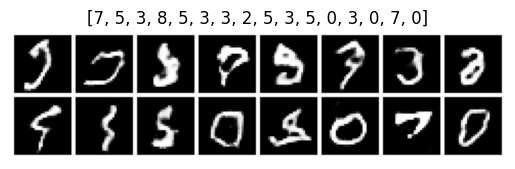

average prediction confidence over 1000 predictions: 0.5558130145072937
cumulative prediction counts: [849, 637, 1557, 1827, 590, 834, 471, 1003, 1424, 1808]
epoch time: 16.74297833442688, total time: 193.84979581832886
Epoch [12/100] Batch [1/469] Discriminator Loss: 0.9168 Generator Loss: 0.9321
Epoch [12/100] Batch [101/469] Discriminator Loss: 0.9443 Generator Loss: 1.0248
Epoch [12/100] Batch [201/469] Discriminator Loss: 1.1616 Generator Loss: 1.7977
Epoch [12/100] Batch [301/469] Discriminator Loss: 1.0024 Generator Loss: 0.8043
Epoch [12/100] Batch [401/469] Discriminator Loss: 1.0405 Generator Loss: 1.5229


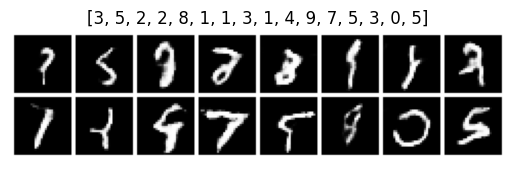

average prediction confidence over 1000 predictions: 0.559748113155365
cumulative prediction counts: [946, 716, 1675, 1961, 638, 906, 511, 1097, 1573, 1977]
epoch time: 17.608238697052002, total time: 211.45803451538086
Epoch [13/100] Batch [1/469] Discriminator Loss: 0.9389 Generator Loss: 1.3323
Epoch [13/100] Batch [101/469] Discriminator Loss: 0.9540 Generator Loss: 1.2672
Epoch [13/100] Batch [201/469] Discriminator Loss: 0.9564 Generator Loss: 1.3436
Epoch [13/100] Batch [301/469] Discriminator Loss: 1.1549 Generator Loss: 1.6712
Epoch [13/100] Batch [401/469] Discriminator Loss: 0.9076 Generator Loss: 1.4569


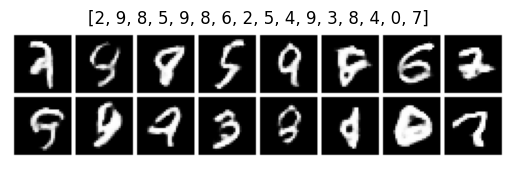

average prediction confidence over 1000 predictions: 0.5560137629508972
cumulative prediction counts: [1032, 793, 1793, 2078, 689, 1003, 544, 1189, 1720, 2159]
epoch time: 16.51104211807251, total time: 227.96907663345337
Epoch [14/100] Batch [1/469] Discriminator Loss: 0.9606 Generator Loss: 0.8537
Epoch [14/100] Batch [101/469] Discriminator Loss: 0.8736 Generator Loss: 1.1546
Epoch [14/100] Batch [201/469] Discriminator Loss: 0.9007 Generator Loss: 0.8977
Epoch [14/100] Batch [301/469] Discriminator Loss: 0.9060 Generator Loss: 0.8297
Epoch [14/100] Batch [401/469] Discriminator Loss: 0.9210 Generator Loss: 1.2191


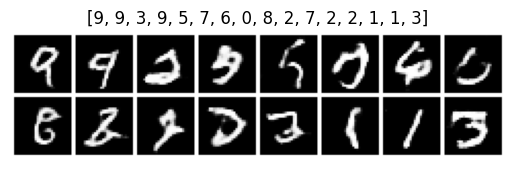

average prediction confidence over 1000 predictions: 0.5583176016807556
cumulative prediction counts: [1122, 871, 1914, 2221, 743, 1077, 587, 1278, 1831, 2356]
epoch time: 16.483953952789307, total time: 244.45303058624268
Epoch [15/100] Batch [1/469] Discriminator Loss: 1.1540 Generator Loss: 1.9432
Epoch [15/100] Batch [101/469] Discriminator Loss: 1.0044 Generator Loss: 0.7198
Epoch [15/100] Batch [201/469] Discriminator Loss: 1.0648 Generator Loss: 0.5806
Epoch [15/100] Batch [301/469] Discriminator Loss: 0.9581 Generator Loss: 1.5400
Epoch [15/100] Batch [401/469] Discriminator Loss: 0.9654 Generator Loss: 0.9245


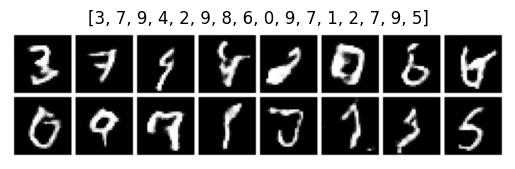

average prediction confidence over 1000 predictions: 0.5682685971260071
cumulative prediction counts: [1211, 938, 2023, 2343, 795, 1174, 624, 1389, 1956, 2547]
epoch time: 17.609150171279907, total time: 262.0621807575226
Epoch [16/100] Batch [1/469] Discriminator Loss: 0.9362 Generator Loss: 1.0252
Epoch [16/100] Batch [101/469] Discriminator Loss: 1.0042 Generator Loss: 1.0213
Epoch [16/100] Batch [201/469] Discriminator Loss: 1.0797 Generator Loss: 0.6294
Epoch [16/100] Batch [301/469] Discriminator Loss: 1.0869 Generator Loss: 1.7140
Epoch [16/100] Batch [401/469] Discriminator Loss: 1.0778 Generator Loss: 2.0301


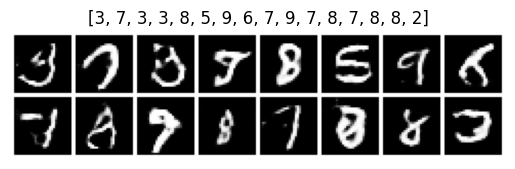

average prediction confidence over 1000 predictions: 0.5706727504730225
cumulative prediction counts: [1310, 1005, 2131, 2462, 858, 1256, 673, 1473, 2096, 2736]
epoch time: 16.726197004318237, total time: 278.7883777618408
Epoch [17/100] Batch [1/469] Discriminator Loss: 0.8639 Generator Loss: 1.2535
Epoch [17/100] Batch [101/469] Discriminator Loss: 0.8297 Generator Loss: 1.4209
Epoch [17/100] Batch [201/469] Discriminator Loss: 0.9324 Generator Loss: 1.5858
Epoch [17/100] Batch [301/469] Discriminator Loss: 0.9757 Generator Loss: 1.1753
Epoch [17/100] Batch [401/469] Discriminator Loss: 0.8353 Generator Loss: 1.6445


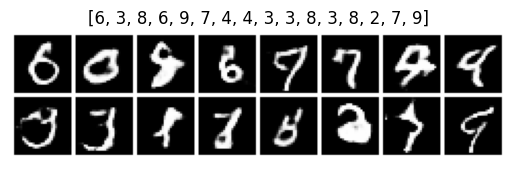

average prediction confidence over 1000 predictions: 0.5603475570678711
cumulative prediction counts: [1401, 1070, 2233, 2585, 905, 1341, 717, 1576, 2240, 2932]
epoch time: 17.25265407562256, total time: 296.0410318374634
Epoch [18/100] Batch [1/469] Discriminator Loss: 0.8961 Generator Loss: 1.1459
Epoch [18/100] Batch [101/469] Discriminator Loss: 0.8424 Generator Loss: 1.4908
Epoch [18/100] Batch [201/469] Discriminator Loss: 0.8787 Generator Loss: 1.4086
Epoch [18/100] Batch [301/469] Discriminator Loss: 0.9199 Generator Loss: 0.9371
Epoch [18/100] Batch [401/469] Discriminator Loss: 0.9110 Generator Loss: 1.7512


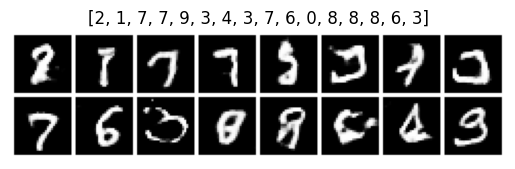

average prediction confidence over 1000 predictions: 0.551459014415741
cumulative prediction counts: [1495, 1145, 2334, 2701, 954, 1430, 757, 1660, 2374, 3150]
epoch time: 17.016575574874878, total time: 313.05760741233826
Epoch [19/100] Batch [1/469] Discriminator Loss: 0.8717 Generator Loss: 1.4071
Epoch [19/100] Batch [101/469] Discriminator Loss: 0.7652 Generator Loss: 1.3761
Epoch [19/100] Batch [201/469] Discriminator Loss: 0.9789 Generator Loss: 0.9153
Epoch [19/100] Batch [301/469] Discriminator Loss: 0.8223 Generator Loss: 1.2900
Epoch [19/100] Batch [401/469] Discriminator Loss: 0.8907 Generator Loss: 1.4205


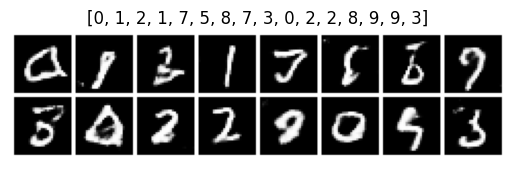

average prediction confidence over 1000 predictions: 0.5664172768592834
cumulative prediction counts: [1580, 1211, 2452, 2833, 992, 1540, 782, 1765, 2500, 3345]
epoch time: 16.679426670074463, total time: 329.7370340824127
Epoch [20/100] Batch [1/469] Discriminator Loss: 0.8288 Generator Loss: 1.5949
Epoch [20/100] Batch [101/469] Discriminator Loss: 0.9190 Generator Loss: 0.9797
Epoch [20/100] Batch [201/469] Discriminator Loss: 0.7172 Generator Loss: 1.2236
Epoch [20/100] Batch [301/469] Discriminator Loss: 0.7975 Generator Loss: 1.2103
Epoch [20/100] Batch [401/469] Discriminator Loss: 0.7801 Generator Loss: 1.5535


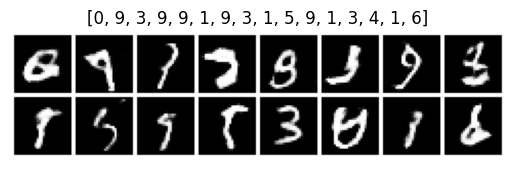

average prediction confidence over 1000 predictions: 0.5751019716262817
cumulative prediction counts: [1672, 1275, 2554, 2958, 1035, 1632, 829, 1875, 2606, 3564]
epoch time: 17.360136032104492, total time: 347.0971701145172
Epoch [21/100] Batch [1/469] Discriminator Loss: 0.9101 Generator Loss: 1.1039
Epoch [21/100] Batch [101/469] Discriminator Loss: 0.9080 Generator Loss: 0.8139
Epoch [21/100] Batch [201/469] Discriminator Loss: 0.9052 Generator Loss: 0.8188
Epoch [21/100] Batch [301/469] Discriminator Loss: 0.8209 Generator Loss: 1.3621
Epoch [21/100] Batch [401/469] Discriminator Loss: 0.9225 Generator Loss: 2.1213


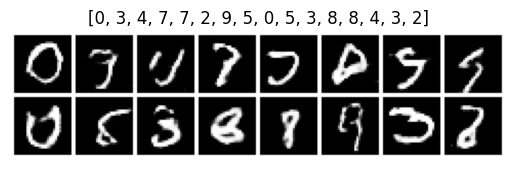

average prediction confidence over 1000 predictions: 0.559819757938385
cumulative prediction counts: [1774, 1340, 2650, 3112, 1068, 1713, 856, 1976, 2729, 3782]
epoch time: 16.775693893432617, total time: 363.87286400794983
Epoch [22/100] Batch [1/469] Discriminator Loss: 0.9105 Generator Loss: 1.9224
Epoch [22/100] Batch [101/469] Discriminator Loss: 0.8720 Generator Loss: 1.6410
Epoch [22/100] Batch [201/469] Discriminator Loss: 0.9510 Generator Loss: 0.7893
Epoch [22/100] Batch [301/469] Discriminator Loss: 0.9522 Generator Loss: 1.2875
Epoch [22/100] Batch [401/469] Discriminator Loss: 0.8386 Generator Loss: 1.7205


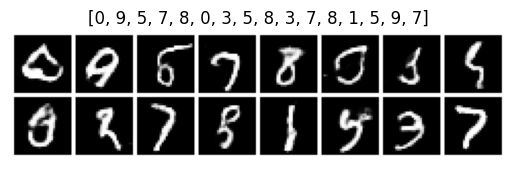

average prediction confidence over 1000 predictions: 0.5572353601455688
cumulative prediction counts: [1886, 1414, 2757, 3259, 1103, 1804, 888, 2073, 2843, 3973]
epoch time: 16.97336506843567, total time: 380.8462290763855
Epoch [23/100] Batch [1/469] Discriminator Loss: 0.8805 Generator Loss: 1.9081
Epoch [23/100] Batch [101/469] Discriminator Loss: 0.8618 Generator Loss: 1.0168
Epoch [23/100] Batch [201/469] Discriminator Loss: 0.8302 Generator Loss: 1.1179
Epoch [23/100] Batch [301/469] Discriminator Loss: 0.7965 Generator Loss: 1.2599
Epoch [23/100] Batch [401/469] Discriminator Loss: 0.7077 Generator Loss: 1.8228


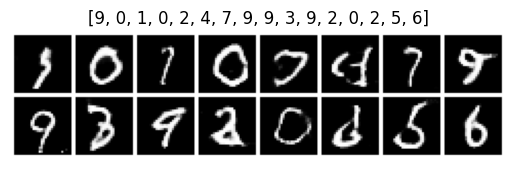

average prediction confidence over 1000 predictions: 0.5668468475341797
cumulative prediction counts: [1999, 1500, 2860, 3368, 1137, 1883, 921, 2214, 2965, 4153]
epoch time: 17.11535358428955, total time: 397.96158266067505
Epoch [24/100] Batch [1/469] Discriminator Loss: 0.8597 Generator Loss: 0.9483
Epoch [24/100] Batch [101/469] Discriminator Loss: 0.7350 Generator Loss: 1.4554
Epoch [24/100] Batch [201/469] Discriminator Loss: 0.8583 Generator Loss: 1.2689
Epoch [24/100] Batch [301/469] Discriminator Loss: 0.8476 Generator Loss: 1.2233
Epoch [24/100] Batch [401/469] Discriminator Loss: 0.7202 Generator Loss: 1.4765


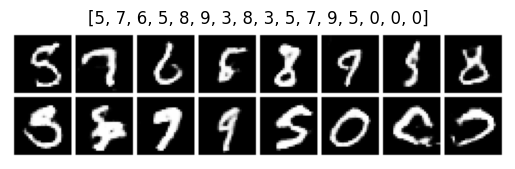

average prediction confidence over 1000 predictions: 0.583240270614624
cumulative prediction counts: [2089, 1557, 2963, 3492, 1182, 1991, 957, 2320, 3079, 4370]
epoch time: 16.66914701461792, total time: 414.63072967529297
Epoch [25/100] Batch [1/469] Discriminator Loss: 0.8561 Generator Loss: 1.3438
Epoch [25/100] Batch [101/469] Discriminator Loss: 0.9061 Generator Loss: 1.1650
Epoch [25/100] Batch [201/469] Discriminator Loss: 0.7569 Generator Loss: 1.3759
Epoch [25/100] Batch [301/469] Discriminator Loss: 0.7939 Generator Loss: 1.8975
Epoch [25/100] Batch [401/469] Discriminator Loss: 0.7059 Generator Loss: 1.9118


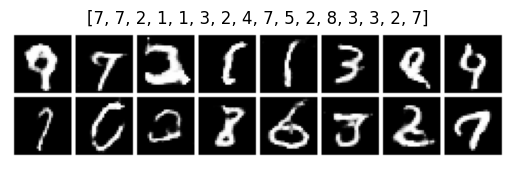

average prediction confidence over 1000 predictions: 0.5801410675048828
cumulative prediction counts: [2201, 1624, 3072, 3621, 1231, 2083, 985, 2424, 3200, 4559]
epoch time: 17.523365259170532, total time: 432.1540949344635
Epoch [26/100] Batch [1/469] Discriminator Loss: 0.7805 Generator Loss: 1.7399
Epoch [26/100] Batch [101/469] Discriminator Loss: 0.8005 Generator Loss: 2.1074
Epoch [26/100] Batch [201/469] Discriminator Loss: 0.9472 Generator Loss: 0.8548
Epoch [26/100] Batch [301/469] Discriminator Loss: 0.9022 Generator Loss: 1.0274
Epoch [26/100] Batch [401/469] Discriminator Loss: 0.7765 Generator Loss: 1.5804


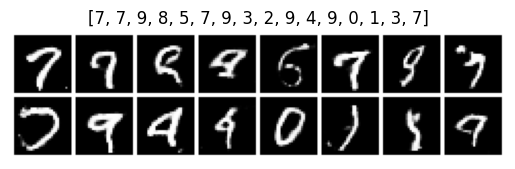

average prediction confidence over 1000 predictions: 0.5800926685333252
cumulative prediction counts: [2302, 1685, 3156, 3747, 1286, 2173, 1014, 2536, 3336, 4765]
epoch time: 16.89484453201294, total time: 449.04893946647644
Epoch [27/100] Batch [1/469] Discriminator Loss: 0.8847 Generator Loss: 1.2318
Epoch [27/100] Batch [101/469] Discriminator Loss: 0.8876 Generator Loss: 1.7136
Epoch [27/100] Batch [201/469] Discriminator Loss: 0.8918 Generator Loss: 1.9825
Epoch [27/100] Batch [301/469] Discriminator Loss: 0.8015 Generator Loss: 1.1950
Epoch [27/100] Batch [401/469] Discriminator Loss: 0.8245 Generator Loss: 1.2718


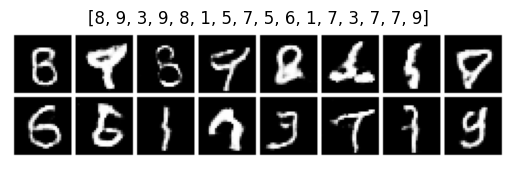

average prediction confidence over 1000 predictions: 0.5934180021286011
cumulative prediction counts: [2409, 1747, 3232, 3894, 1331, 2261, 1048, 2653, 3447, 4978]
epoch time: 16.74502396583557, total time: 465.793963432312
Epoch [28/100] Batch [1/469] Discriminator Loss: 0.9173 Generator Loss: 1.0208
Epoch [28/100] Batch [101/469] Discriminator Loss: 0.9024 Generator Loss: 2.0870
Epoch [28/100] Batch [201/469] Discriminator Loss: 0.8254 Generator Loss: 1.3912
Epoch [28/100] Batch [301/469] Discriminator Loss: 0.8918 Generator Loss: 1.0601
Epoch [28/100] Batch [401/469] Discriminator Loss: 0.7996 Generator Loss: 1.4890


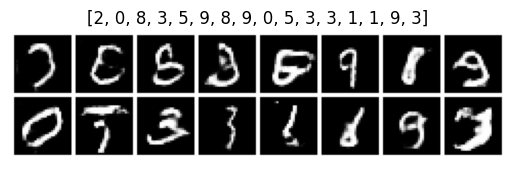

average prediction confidence over 1000 predictions: 0.5704487562179565
cumulative prediction counts: [2507, 1797, 3335, 4035, 1365, 2339, 1080, 2770, 3557, 5215]
epoch time: 17.396907091140747, total time: 483.19087052345276
Epoch [29/100] Batch [1/469] Discriminator Loss: 0.7884 Generator Loss: 1.8095
Epoch [29/100] Batch [101/469] Discriminator Loss: 0.7571 Generator Loss: 1.2000
Epoch [29/100] Batch [201/469] Discriminator Loss: 0.8596 Generator Loss: 1.8101
Epoch [29/100] Batch [301/469] Discriminator Loss: 0.8003 Generator Loss: 1.3088
Epoch [29/100] Batch [401/469] Discriminator Loss: 0.8802 Generator Loss: 1.8592


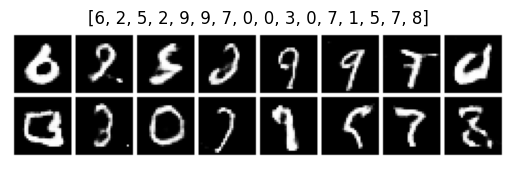

average prediction confidence over 1000 predictions: 0.5925363898277283
cumulative prediction counts: [2619, 1858, 3433, 4169, 1412, 2413, 1110, 2895, 3689, 5402]
epoch time: 16.563279628753662, total time: 499.7541501522064
Epoch [30/100] Batch [1/469] Discriminator Loss: 0.8673 Generator Loss: 1.7802
Epoch [30/100] Batch [101/469] Discriminator Loss: 0.7283 Generator Loss: 1.2841
Epoch [30/100] Batch [201/469] Discriminator Loss: 0.7796 Generator Loss: 1.6211
Epoch [30/100] Batch [301/469] Discriminator Loss: 0.8910 Generator Loss: 2.5416
Epoch [30/100] Batch [401/469] Discriminator Loss: 0.7350 Generator Loss: 1.4707


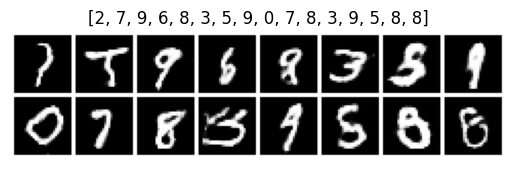

average prediction confidence over 1000 predictions: 0.5914509296417236
cumulative prediction counts: [2736, 1903, 3518, 4302, 1452, 2501, 1143, 3001, 3808, 5636]
epoch time: 17.496458768844604, total time: 517.250608921051
Epoch [31/100] Batch [1/469] Discriminator Loss: 0.8357 Generator Loss: 2.5398
Epoch [31/100] Batch [101/469] Discriminator Loss: 0.7849 Generator Loss: 1.6527
Epoch [31/100] Batch [201/469] Discriminator Loss: 0.8294 Generator Loss: 1.5079
Epoch [31/100] Batch [301/469] Discriminator Loss: 0.7795 Generator Loss: 1.9433
Epoch [31/100] Batch [401/469] Discriminator Loss: 0.7609 Generator Loss: 1.1776


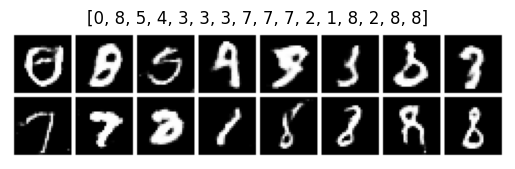

average prediction confidence over 1000 predictions: 0.5888118147850037
cumulative prediction counts: [2863, 1955, 3598, 4429, 1503, 2580, 1171, 3144, 3934, 5823]
epoch time: 17.054688692092896, total time: 534.3052976131439
Epoch [32/100] Batch [1/469] Discriminator Loss: 0.7634 Generator Loss: 1.6125
Epoch [32/100] Batch [101/469] Discriminator Loss: 0.7828 Generator Loss: 1.6679
Epoch [32/100] Batch [201/469] Discriminator Loss: 0.7612 Generator Loss: 1.7562
Epoch [32/100] Batch [301/469] Discriminator Loss: 0.8872 Generator Loss: 1.3922
Epoch [32/100] Batch [401/469] Discriminator Loss: 0.8196 Generator Loss: 2.1769


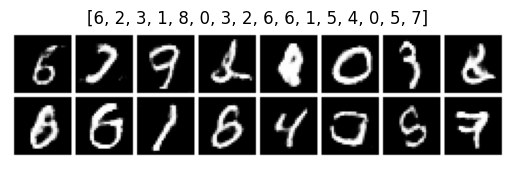

average prediction confidence over 1000 predictions: 0.5832618474960327
cumulative prediction counts: [2971, 2013, 3694, 4555, 1550, 2670, 1205, 3255, 4075, 6012]
epoch time: 16.899505853652954, total time: 551.2048034667969
Epoch [33/100] Batch [1/469] Discriminator Loss: 0.7261 Generator Loss: 2.0500
Epoch [33/100] Batch [101/469] Discriminator Loss: 0.7706 Generator Loss: 1.7882
Epoch [33/100] Batch [201/469] Discriminator Loss: 0.8343 Generator Loss: 1.0720
Epoch [33/100] Batch [301/469] Discriminator Loss: 0.7989 Generator Loss: 1.1089
Epoch [33/100] Batch [401/469] Discriminator Loss: 0.7131 Generator Loss: 1.9467


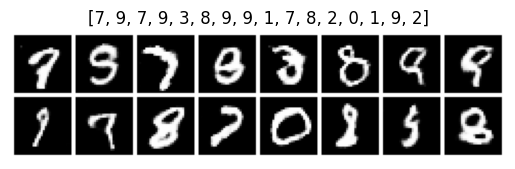

average prediction confidence over 1000 predictions: 0.591508150100708
cumulative prediction counts: [3084, 2064, 3784, 4683, 1586, 2739, 1231, 3397, 4195, 6237]
epoch time: 17.57098698616028, total time: 568.7757904529572
Epoch [34/100] Batch [1/469] Discriminator Loss: 0.8530 Generator Loss: 2.1309
Epoch [34/100] Batch [101/469] Discriminator Loss: 0.7901 Generator Loss: 1.0845
Epoch [34/100] Batch [201/469] Discriminator Loss: 0.8624 Generator Loss: 1.7300
Epoch [34/100] Batch [301/469] Discriminator Loss: 0.7995 Generator Loss: 1.5615
Epoch [34/100] Batch [401/469] Discriminator Loss: 0.9381 Generator Loss: 2.2823


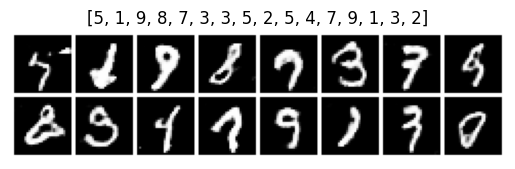

average prediction confidence over 1000 predictions: 0.5961942672729492
cumulative prediction counts: [3201, 2114, 3881, 4817, 1632, 2811, 1254, 3534, 4310, 6446]
epoch time: 16.776803493499756, total time: 585.5525939464569
Epoch [35/100] Batch [1/469] Discriminator Loss: 0.7267 Generator Loss: 1.4180
Epoch [35/100] Batch [101/469] Discriminator Loss: 0.7198 Generator Loss: 1.4729
Epoch [35/100] Batch [201/469] Discriminator Loss: 0.7947 Generator Loss: 1.1188
Epoch [35/100] Batch [301/469] Discriminator Loss: 0.9423 Generator Loss: 2.0227
Epoch [35/100] Batch [401/469] Discriminator Loss: 0.8040 Generator Loss: 1.1822


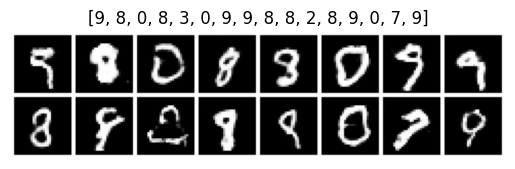

average prediction confidence over 1000 predictions: 0.590633749961853
cumulative prediction counts: [3327, 2170, 3971, 4937, 1677, 2878, 1286, 3661, 4439, 6654]
epoch time: 17.32705521583557, total time: 602.8796491622925
Epoch [36/100] Batch [1/469] Discriminator Loss: 0.7298 Generator Loss: 1.2321
Epoch [36/100] Batch [101/469] Discriminator Loss: 0.9562 Generator Loss: 2.3223
Epoch [36/100] Batch [201/469] Discriminator Loss: 0.8301 Generator Loss: 1.2709
Epoch [36/100] Batch [301/469] Discriminator Loss: 0.7858 Generator Loss: 1.7746
Epoch [36/100] Batch [401/469] Discriminator Loss: 0.8071 Generator Loss: 1.9486


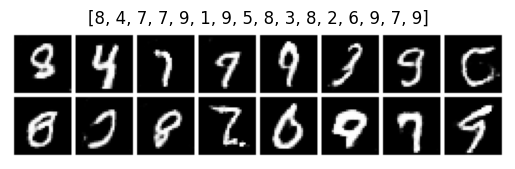

average prediction confidence over 1000 predictions: 0.5957424640655518
cumulative prediction counts: [3454, 2227, 4060, 5059, 1719, 2932, 1316, 3780, 4546, 6907]
epoch time: 17.05198907852173, total time: 619.9316382408142
Epoch [37/100] Batch [1/469] Discriminator Loss: 0.8184 Generator Loss: 1.3632
Epoch [37/100] Batch [101/469] Discriminator Loss: 0.6986 Generator Loss: 1.4163
Epoch [37/100] Batch [201/469] Discriminator Loss: 0.7671 Generator Loss: 1.3900
Epoch [37/100] Batch [301/469] Discriminator Loss: 0.8384 Generator Loss: 1.0678
Epoch [37/100] Batch [401/469] Discriminator Loss: 0.7332 Generator Loss: 1.9383


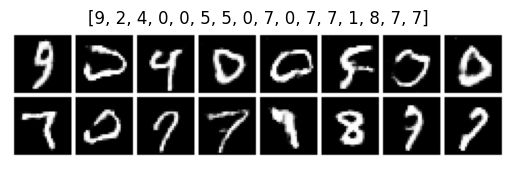

average prediction confidence over 1000 predictions: 0.5933522582054138
cumulative prediction counts: [3572, 2287, 4134, 5175, 1765, 3005, 1345, 3934, 4680, 7103]
epoch time: 17.212650299072266, total time: 637.1442885398865
Epoch [38/100] Batch [1/469] Discriminator Loss: 0.7688 Generator Loss: 1.2885
Epoch [38/100] Batch [101/469] Discriminator Loss: 0.9016 Generator Loss: 1.3106
Epoch [38/100] Batch [201/469] Discriminator Loss: 0.7962 Generator Loss: 1.4955
Epoch [38/100] Batch [301/469] Discriminator Loss: 0.7889 Generator Loss: 1.8832
Epoch [38/100] Batch [401/469] Discriminator Loss: 0.7444 Generator Loss: 1.9729


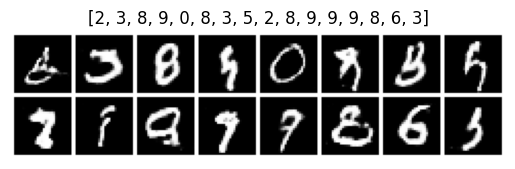

average prediction confidence over 1000 predictions: 0.5942381620407104
cumulative prediction counts: [3684, 2344, 4209, 5309, 1789, 3087, 1374, 4092, 4805, 7307]
epoch time: 17.86508584022522, total time: 655.0093743801117
Epoch [39/100] Batch [1/469] Discriminator Loss: 0.8283 Generator Loss: 1.2763
Epoch [39/100] Batch [101/469] Discriminator Loss: 0.8022 Generator Loss: 1.8546
Epoch [39/100] Batch [201/469] Discriminator Loss: 0.8644 Generator Loss: 2.5399
Epoch [39/100] Batch [301/469] Discriminator Loss: 0.7269 Generator Loss: 0.9796
Epoch [39/100] Batch [401/469] Discriminator Loss: 0.7449 Generator Loss: 1.8251


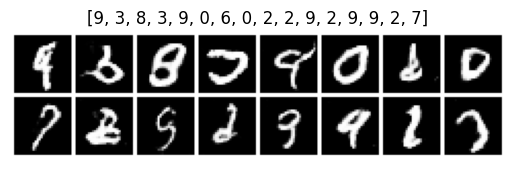

average prediction confidence over 1000 predictions: 0.6081174612045288
cumulative prediction counts: [3785, 2405, 4289, 5456, 1823, 3153, 1391, 4223, 4942, 7533]
epoch time: 16.898927688598633, total time: 671.9083020687103
Epoch [40/100] Batch [1/469] Discriminator Loss: 0.8079 Generator Loss: 2.4717
Epoch [40/100] Batch [101/469] Discriminator Loss: 0.7375 Generator Loss: 1.8219
Epoch [40/100] Batch [201/469] Discriminator Loss: 0.8145 Generator Loss: 1.4678
Epoch [40/100] Batch [301/469] Discriminator Loss: 0.8074 Generator Loss: 1.2336
Epoch [40/100] Batch [401/469] Discriminator Loss: 0.7532 Generator Loss: 1.5707


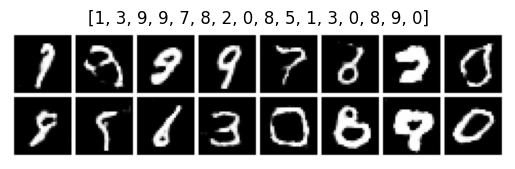

average prediction confidence over 1000 predictions: 0.5993520021438599
cumulative prediction counts: [3897, 2444, 4375, 5592, 1860, 3208, 1416, 4345, 5087, 7776]
epoch time: 17.64510416984558, total time: 689.5534062385559
Epoch [41/100] Batch [1/469] Discriminator Loss: 0.9323 Generator Loss: 2.2313
Epoch [41/100] Batch [101/469] Discriminator Loss: 0.8483 Generator Loss: 2.0329
Epoch [41/100] Batch [201/469] Discriminator Loss: 0.7084 Generator Loss: 1.6505
Epoch [41/100] Batch [301/469] Discriminator Loss: 0.8093 Generator Loss: 1.5938
Epoch [41/100] Batch [401/469] Discriminator Loss: 0.8552 Generator Loss: 1.4766


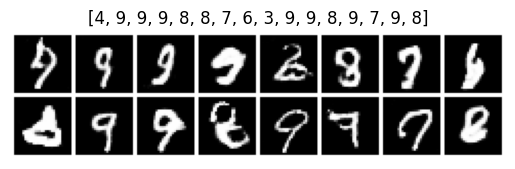

average prediction confidence over 1000 predictions: 0.6106069087982178
cumulative prediction counts: [4010, 2490, 4471, 5718, 1899, 3278, 1437, 4489, 5204, 8004]
epoch time: 17.201085090637207, total time: 706.7544913291931
Epoch [42/100] Batch [1/469] Discriminator Loss: 0.7443 Generator Loss: 2.0832
Epoch [42/100] Batch [101/469] Discriminator Loss: 0.8847 Generator Loss: 1.5325
Epoch [42/100] Batch [201/469] Discriminator Loss: 0.7200 Generator Loss: 1.2824
Epoch [42/100] Batch [301/469] Discriminator Loss: 0.7482 Generator Loss: 1.3848
Epoch [42/100] Batch [401/469] Discriminator Loss: 0.8385 Generator Loss: 1.3452


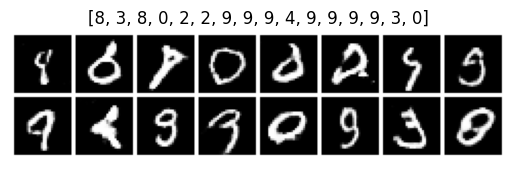

average prediction confidence over 1000 predictions: 0.6137831211090088
cumulative prediction counts: [4140, 2524, 4565, 5834, 1942, 3333, 1476, 4611, 5334, 8241]
epoch time: 16.77880024909973, total time: 723.5332915782928
Epoch [43/100] Batch [1/469] Discriminator Loss: 0.7071 Generator Loss: 1.6438
Epoch [43/100] Batch [101/469] Discriminator Loss: 0.7663 Generator Loss: 1.8153
Epoch [43/100] Batch [201/469] Discriminator Loss: 0.8210 Generator Loss: 1.3379
Epoch [43/100] Batch [301/469] Discriminator Loss: 0.8040 Generator Loss: 1.7336
Epoch [43/100] Batch [401/469] Discriminator Loss: 0.8600 Generator Loss: 1.7398


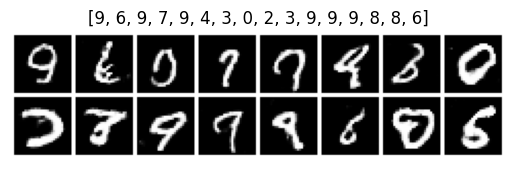

average prediction confidence over 1000 predictions: 0.5947844386100769
cumulative prediction counts: [4255, 2562, 4641, 5948, 1995, 3412, 1509, 4760, 5441, 8477]
epoch time: 17.152092456817627, total time: 740.6853840351105
Epoch [44/100] Batch [1/469] Discriminator Loss: 0.7866 Generator Loss: 2.0706
Epoch [44/100] Batch [101/469] Discriminator Loss: 0.7404 Generator Loss: 2.0320
Epoch [44/100] Batch [201/469] Discriminator Loss: 0.8800 Generator Loss: 1.0901
Epoch [44/100] Batch [301/469] Discriminator Loss: 0.7680 Generator Loss: 1.4545
Epoch [44/100] Batch [401/469] Discriminator Loss: 0.8008 Generator Loss: 1.5534


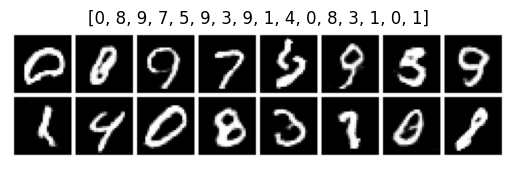

average prediction confidence over 1000 predictions: 0.6005153059959412
cumulative prediction counts: [4371, 2606, 4711, 6071, 2049, 3479, 1536, 4894, 5569, 8714]
epoch time: 16.79433584213257, total time: 757.479719877243
Epoch [45/100] Batch [1/469] Discriminator Loss: 0.6937 Generator Loss: 2.2439
Epoch [45/100] Batch [101/469] Discriminator Loss: 0.7517 Generator Loss: 1.7577
Epoch [45/100] Batch [201/469] Discriminator Loss: 0.7793 Generator Loss: 1.7575
Epoch [45/100] Batch [301/469] Discriminator Loss: 0.8469 Generator Loss: 1.9660
Epoch [45/100] Batch [401/469] Discriminator Loss: 0.7474 Generator Loss: 1.3410


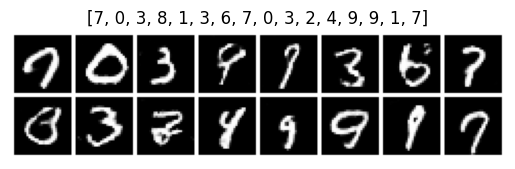

average prediction confidence over 1000 predictions: 0.6027368307113647
cumulative prediction counts: [4477, 2659, 4782, 6203, 2107, 3540, 1563, 5039, 5699, 8931]
epoch time: 17.192437648773193, total time: 774.6721575260162
Epoch [46/100] Batch [1/469] Discriminator Loss: 0.7648 Generator Loss: 2.2666
Epoch [46/100] Batch [101/469] Discriminator Loss: 0.7340 Generator Loss: 1.8082
Epoch [46/100] Batch [201/469] Discriminator Loss: 0.9122 Generator Loss: 1.0749
Epoch [46/100] Batch [301/469] Discriminator Loss: 0.7578 Generator Loss: 2.3647
Epoch [46/100] Batch [401/469] Discriminator Loss: 0.6769 Generator Loss: 1.8236


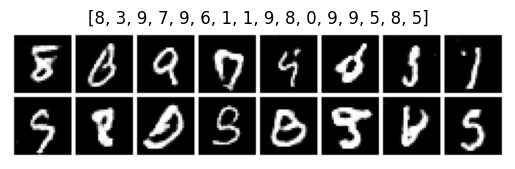

average prediction confidence over 1000 predictions: 0.60271155834198
cumulative prediction counts: [4601, 2705, 4850, 6331, 2144, 3597, 1589, 5187, 5817, 9179]
epoch time: 17.564783096313477, total time: 792.2369406223297
Epoch [47/100] Batch [1/469] Discriminator Loss: 0.7552 Generator Loss: 1.6620
Epoch [47/100] Batch [101/469] Discriminator Loss: 0.8246 Generator Loss: 1.1761
Epoch [47/100] Batch [201/469] Discriminator Loss: 0.8683 Generator Loss: 2.4259
Epoch [47/100] Batch [301/469] Discriminator Loss: 0.6398 Generator Loss: 1.3373
Epoch [47/100] Batch [401/469] Discriminator Loss: 0.7973 Generator Loss: 1.3818


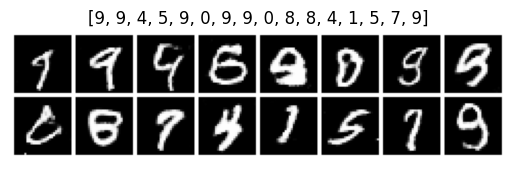

average prediction confidence over 1000 predictions: 0.6114330291748047
cumulative prediction counts: [4723, 2732, 4921, 6455, 2203, 3673, 1605, 5305, 5937, 9446]
epoch time: 16.760247468948364, total time: 808.9971880912781
Epoch [48/100] Batch [1/469] Discriminator Loss: 0.7565 Generator Loss: 1.0421
Epoch [48/100] Batch [101/469] Discriminator Loss: 0.7805 Generator Loss: 2.3825
Epoch [48/100] Batch [201/469] Discriminator Loss: 0.7465 Generator Loss: 1.6528
Epoch [48/100] Batch [301/469] Discriminator Loss: 0.8211 Generator Loss: 1.8221
Epoch [48/100] Batch [401/469] Discriminator Loss: 0.6466 Generator Loss: 1.6883


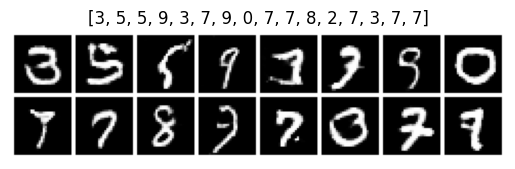

average prediction confidence over 1000 predictions: 0.6178517937660217
cumulative prediction counts: [4839, 2776, 4989, 6596, 2247, 3742, 1633, 5450, 6054, 9674]
epoch time: 17.62616777420044, total time: 826.6233558654785
Epoch [49/100] Batch [1/469] Discriminator Loss: 0.8439 Generator Loss: 1.1835
Epoch [49/100] Batch [101/469] Discriminator Loss: 0.9384 Generator Loss: 1.2828
Epoch [49/100] Batch [201/469] Discriminator Loss: 0.7750 Generator Loss: 1.4754
Epoch [49/100] Batch [301/469] Discriminator Loss: 0.7596 Generator Loss: 2.1139
Epoch [49/100] Batch [401/469] Discriminator Loss: 0.6672 Generator Loss: 1.7598


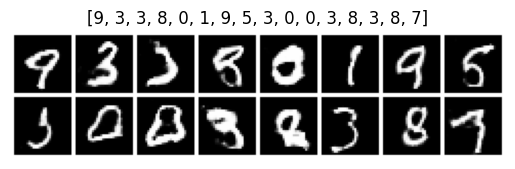

average prediction confidence over 1000 predictions: 0.6087614893913269
cumulative prediction counts: [4957, 2830, 5080, 6716, 2290, 3803, 1667, 5588, 6162, 9907]
epoch time: 16.94358539581299, total time: 843.5669412612915
Epoch [50/100] Batch [1/469] Discriminator Loss: 0.7033 Generator Loss: 1.7226
Epoch [50/100] Batch [101/469] Discriminator Loss: 0.7307 Generator Loss: 2.0574
Epoch [50/100] Batch [201/469] Discriminator Loss: 0.9779 Generator Loss: 0.8046
Epoch [50/100] Batch [301/469] Discriminator Loss: 0.6938 Generator Loss: 1.6631
Epoch [50/100] Batch [401/469] Discriminator Loss: 0.6460 Generator Loss: 1.8405


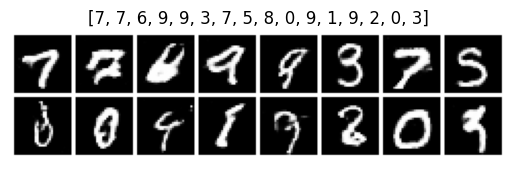

average prediction confidence over 1000 predictions: 0.6228142380714417
cumulative prediction counts: [5069, 2870, 5152, 6857, 2327, 3857, 1693, 5750, 6275, 10150]
epoch time: 16.637333869934082, total time: 860.2042751312256
Epoch [51/100] Batch [1/469] Discriminator Loss: 0.6747 Generator Loss: 1.4819
Epoch [51/100] Batch [101/469] Discriminator Loss: 0.7478 Generator Loss: 1.5907
Epoch [51/100] Batch [201/469] Discriminator Loss: 0.6723 Generator Loss: 1.5234
Epoch [51/100] Batch [301/469] Discriminator Loss: 0.7602 Generator Loss: 1.7880
Epoch [51/100] Batch [401/469] Discriminator Loss: 0.6706 Generator Loss: 1.6359


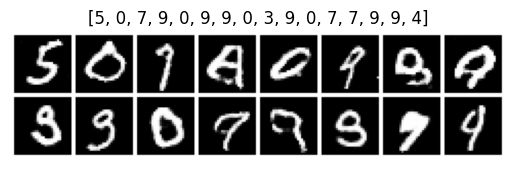

average prediction confidence over 1000 predictions: 0.6101695895195007
cumulative prediction counts: [5176, 2902, 5238, 6979, 2377, 3912, 1723, 5906, 6399, 10388]
epoch time: 17.391608476638794, total time: 877.5958836078644
Epoch [52/100] Batch [1/469] Discriminator Loss: 0.7480 Generator Loss: 1.4770
Epoch [52/100] Batch [101/469] Discriminator Loss: 0.6694 Generator Loss: 1.7312
Epoch [52/100] Batch [201/469] Discriminator Loss: 0.8087 Generator Loss: 1.7413
Epoch [52/100] Batch [301/469] Discriminator Loss: 0.8371 Generator Loss: 1.4175
Epoch [52/100] Batch [401/469] Discriminator Loss: 0.6934 Generator Loss: 1.9181


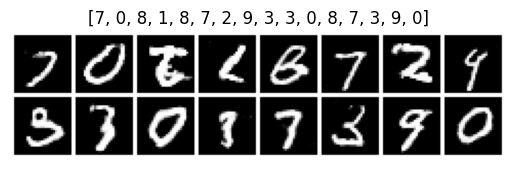

average prediction confidence over 1000 predictions: 0.6106818914413452
cumulative prediction counts: [5288, 2949, 5318, 7093, 2429, 3978, 1752, 6053, 6508, 10632]
epoch time: 16.995400190353394, total time: 894.5912837982178
Epoch [53/100] Batch [1/469] Discriminator Loss: 0.8448 Generator Loss: 2.0987
Epoch [53/100] Batch [101/469] Discriminator Loss: 0.6984 Generator Loss: 1.4233
Epoch [53/100] Batch [201/469] Discriminator Loss: 0.6691 Generator Loss: 2.0845
Epoch [53/100] Batch [301/469] Discriminator Loss: 0.6669 Generator Loss: 1.6590
Epoch [53/100] Batch [401/469] Discriminator Loss: 0.6905 Generator Loss: 2.2231


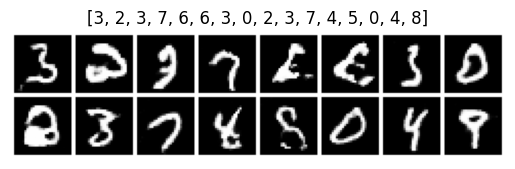

average prediction confidence over 1000 predictions: 0.6126707196235657
cumulative prediction counts: [5413, 2988, 5391, 7211, 2470, 4043, 1778, 6195, 6632, 10879]
epoch time: 17.64436650276184, total time: 912.2356503009796
Epoch [54/100] Batch [1/469] Discriminator Loss: 0.9571 Generator Loss: 1.2336
Epoch [54/100] Batch [101/469] Discriminator Loss: 0.7298 Generator Loss: 2.1295
Epoch [54/100] Batch [201/469] Discriminator Loss: 0.8596 Generator Loss: 1.3445
Epoch [54/100] Batch [301/469] Discriminator Loss: 0.8885 Generator Loss: 2.1462
Epoch [54/100] Batch [401/469] Discriminator Loss: 0.6716 Generator Loss: 1.7431


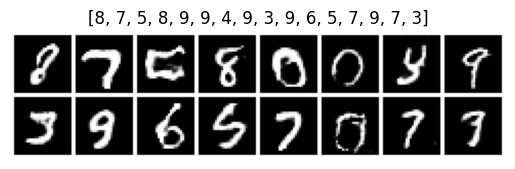

average prediction confidence over 1000 predictions: 0.6092392802238464
cumulative prediction counts: [5523, 3020, 5466, 7343, 2520, 4104, 1804, 6333, 6754, 11133]
epoch time: 16.815804481506348, total time: 929.051454782486
Epoch [55/100] Batch [1/469] Discriminator Loss: 0.7561 Generator Loss: 1.7386
Epoch [55/100] Batch [101/469] Discriminator Loss: 0.7222 Generator Loss: 1.7590
Epoch [55/100] Batch [201/469] Discriminator Loss: 0.7104 Generator Loss: 2.3050
Epoch [55/100] Batch [301/469] Discriminator Loss: 0.7017 Generator Loss: 1.6636
Epoch [55/100] Batch [401/469] Discriminator Loss: 0.7456 Generator Loss: 1.7780


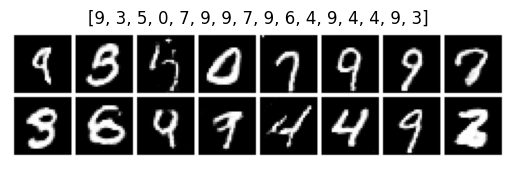

average prediction confidence over 1000 predictions: 0.6177384257316589
cumulative prediction counts: [5631, 3059, 5520, 7476, 2572, 4164, 1838, 6499, 6877, 11364]
epoch time: 16.716394424438477, total time: 945.7678492069244
Epoch [56/100] Batch [1/469] Discriminator Loss: 0.6704 Generator Loss: 2.0374
Epoch [56/100] Batch [101/469] Discriminator Loss: 0.8888 Generator Loss: 1.0241
Epoch [56/100] Batch [201/469] Discriminator Loss: 0.7891 Generator Loss: 1.5012
Epoch [56/100] Batch [301/469] Discriminator Loss: 0.7025 Generator Loss: 1.5984
Epoch [56/100] Batch [401/469] Discriminator Loss: 0.8023 Generator Loss: 1.6460


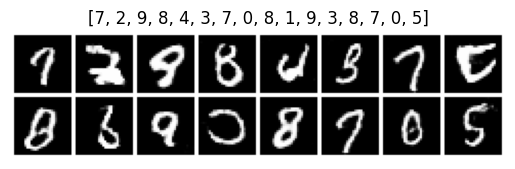

average prediction confidence over 1000 predictions: 0.616735577583313
cumulative prediction counts: [5745, 3095, 5590, 7595, 2633, 4225, 1868, 6641, 6982, 11626]
epoch time: 17.265733003616333, total time: 963.0335822105408
Epoch [57/100] Batch [1/469] Discriminator Loss: 0.7539 Generator Loss: 1.7355
Epoch [57/100] Batch [101/469] Discriminator Loss: 0.7121 Generator Loss: 2.0165
Epoch [57/100] Batch [201/469] Discriminator Loss: 0.8431 Generator Loss: 2.5414
Epoch [57/100] Batch [301/469] Discriminator Loss: 0.7924 Generator Loss: 2.1336
Epoch [57/100] Batch [401/469] Discriminator Loss: 0.7845 Generator Loss: 1.8436


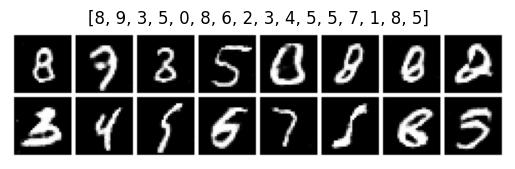

average prediction confidence over 1000 predictions: 0.6046732664108276
cumulative prediction counts: [5881, 3134, 5661, 7727, 2694, 4284, 1884, 6776, 7098, 11861]
epoch time: 16.839449405670166, total time: 979.8730316162109
Epoch [58/100] Batch [1/469] Discriminator Loss: 0.7256 Generator Loss: 2.1020
Epoch [58/100] Batch [101/469] Discriminator Loss: 0.6641 Generator Loss: 1.4932
Epoch [58/100] Batch [201/469] Discriminator Loss: 0.8505 Generator Loss: 1.6832
Epoch [58/100] Batch [301/469] Discriminator Loss: 0.7431 Generator Loss: 1.6005
Epoch [58/100] Batch [401/469] Discriminator Loss: 0.8014 Generator Loss: 2.0051


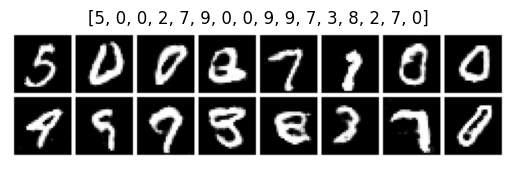

average prediction confidence over 1000 predictions: 0.6181488037109375
cumulative prediction counts: [5998, 3170, 5737, 7859, 2752, 4323, 1899, 6924, 7219, 12119]
epoch time: 17.41152572631836, total time: 997.2845573425293
Epoch [59/100] Batch [1/469] Discriminator Loss: 0.8100 Generator Loss: 1.2248
Epoch [59/100] Batch [101/469] Discriminator Loss: 0.7989 Generator Loss: 2.0949
Epoch [59/100] Batch [201/469] Discriminator Loss: 0.8404 Generator Loss: 1.9354
Epoch [59/100] Batch [301/469] Discriminator Loss: 0.6328 Generator Loss: 1.4521
Epoch [59/100] Batch [401/469] Discriminator Loss: 0.9965 Generator Loss: 2.4578


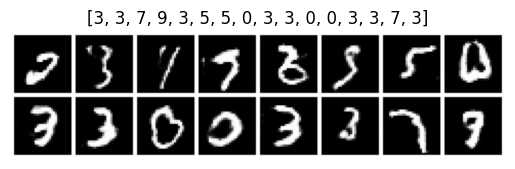

average prediction confidence over 1000 predictions: 0.6083680391311646
cumulative prediction counts: [6113, 3216, 5820, 7989, 2815, 4373, 1917, 7079, 7350, 12328]
epoch time: 17.254690647125244, total time: 1014.5392479896545
Epoch [60/100] Batch [1/469] Discriminator Loss: 0.7811 Generator Loss: 1.6383
Epoch [60/100] Batch [101/469] Discriminator Loss: 0.8615 Generator Loss: 2.9084
Epoch [60/100] Batch [201/469] Discriminator Loss: 0.6850 Generator Loss: 1.9104
Epoch [60/100] Batch [301/469] Discriminator Loss: 0.7420 Generator Loss: 1.5195
Epoch [60/100] Batch [401/469] Discriminator Loss: 0.8453 Generator Loss: 1.6735


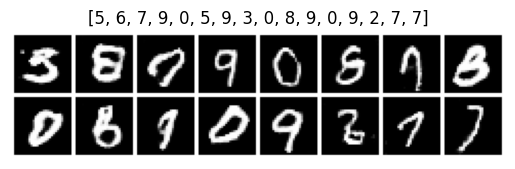

average prediction confidence over 1000 predictions: 0.6111584901809692
cumulative prediction counts: [6222, 3240, 5892, 8130, 2866, 4443, 1930, 7222, 7464, 12591]
epoch time: 16.542744874954224, total time: 1031.0819928646088
Epoch [61/100] Batch [1/469] Discriminator Loss: 0.7826 Generator Loss: 2.4335
Epoch [61/100] Batch [101/469] Discriminator Loss: 0.8126 Generator Loss: 1.1690
Epoch [61/100] Batch [201/469] Discriminator Loss: 0.8335 Generator Loss: 1.3538
Epoch [61/100] Batch [301/469] Discriminator Loss: 0.8438 Generator Loss: 1.3454
Epoch [61/100] Batch [401/469] Discriminator Loss: 0.6859 Generator Loss: 1.7190


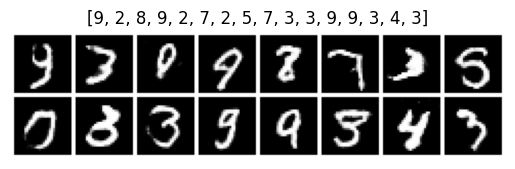

average prediction confidence over 1000 predictions: 0.6266549229621887
cumulative prediction counts: [6346, 3272, 5953, 8259, 2918, 4488, 1960, 7377, 7586, 12841]
epoch time: 17.257585763931274, total time: 1048.33957862854
Epoch [62/100] Batch [1/469] Discriminator Loss: 1.2272 Generator Loss: 3.2520
Epoch [62/100] Batch [101/469] Discriminator Loss: 0.7163 Generator Loss: 2.2426
Epoch [62/100] Batch [201/469] Discriminator Loss: 0.9835 Generator Loss: 1.1666
Epoch [62/100] Batch [301/469] Discriminator Loss: 0.6474 Generator Loss: 2.0494
Epoch [62/100] Batch [401/469] Discriminator Loss: 0.6719 Generator Loss: 1.9088


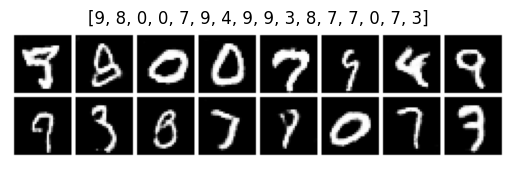

average prediction confidence over 1000 predictions: 0.6189795136451721
cumulative prediction counts: [6459, 3305, 6010, 8388, 2964, 4558, 1986, 7520, 7701, 13109]
epoch time: 16.804033994674683, total time: 1065.1436126232147
Epoch [63/100] Batch [1/469] Discriminator Loss: 0.6510 Generator Loss: 2.0270
Epoch [63/100] Batch [101/469] Discriminator Loss: 0.7270 Generator Loss: 1.5692
Epoch [63/100] Batch [201/469] Discriminator Loss: 0.6539 Generator Loss: 1.9692
Epoch [63/100] Batch [301/469] Discriminator Loss: 0.7527 Generator Loss: 1.9456
Epoch [63/100] Batch [401/469] Discriminator Loss: 0.6087 Generator Loss: 2.3205


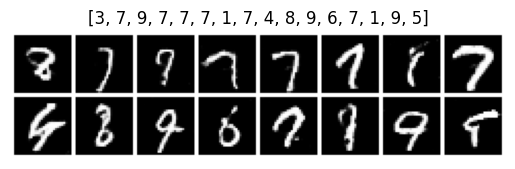

average prediction confidence over 1000 predictions: 0.619613528251648
cumulative prediction counts: [6569, 3338, 6086, 8509, 3023, 4612, 2016, 7679, 7817, 13351]
epoch time: 16.876274347305298, total time: 1082.01988697052
Epoch [64/100] Batch [1/469] Discriminator Loss: 0.8146 Generator Loss: 1.1199
Epoch [64/100] Batch [101/469] Discriminator Loss: 0.6413 Generator Loss: 2.2113
Epoch [64/100] Batch [201/469] Discriminator Loss: 0.6463 Generator Loss: 1.8079
Epoch [64/100] Batch [301/469] Discriminator Loss: 0.7328 Generator Loss: 1.9340
Epoch [64/100] Batch [401/469] Discriminator Loss: 0.8294 Generator Loss: 1.3048


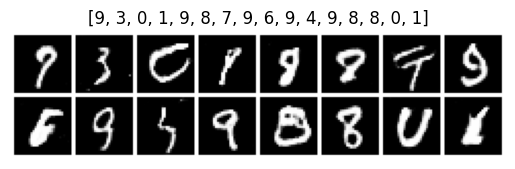

average prediction confidence over 1000 predictions: 0.6228187680244446
cumulative prediction counts: [6679, 3391, 6152, 8637, 3096, 4674, 2033, 7826, 7896, 13616]
epoch time: 17.618504524230957, total time: 1099.638391494751
Epoch [65/100] Batch [1/469] Discriminator Loss: 0.6378 Generator Loss: 1.6786
Epoch [65/100] Batch [101/469] Discriminator Loss: 0.6962 Generator Loss: 1.8506
Epoch [65/100] Batch [201/469] Discriminator Loss: 0.7342 Generator Loss: 1.9131
Epoch [65/100] Batch [301/469] Discriminator Loss: 0.8553 Generator Loss: 1.6428
Epoch [65/100] Batch [401/469] Discriminator Loss: 0.6870 Generator Loss: 2.1575


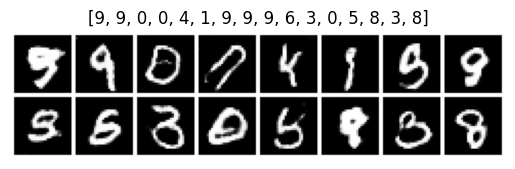

average prediction confidence over 1000 predictions: 0.6293926239013672
cumulative prediction counts: [6788, 3429, 6236, 8752, 3158, 4723, 2053, 7974, 7996, 13891]
epoch time: 16.668323755264282, total time: 1116.3067152500153
Epoch [66/100] Batch [1/469] Discriminator Loss: 0.6879 Generator Loss: 1.6727
Epoch [66/100] Batch [101/469] Discriminator Loss: 0.7523 Generator Loss: 1.7856
Epoch [66/100] Batch [201/469] Discriminator Loss: 0.8816 Generator Loss: 2.6138
Epoch [66/100] Batch [301/469] Discriminator Loss: 0.7695 Generator Loss: 2.0576
Epoch [66/100] Batch [401/469] Discriminator Loss: 0.6490 Generator Loss: 1.6999


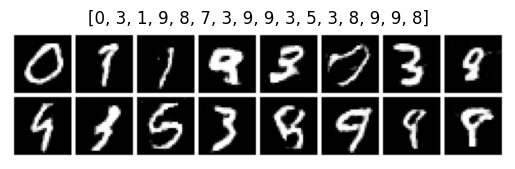

average prediction confidence over 1000 predictions: 0.6203957796096802
cumulative prediction counts: [6906, 3452, 6310, 8888, 3220, 4785, 2082, 8116, 8111, 14130]
epoch time: 17.449116468429565, total time: 1133.7558317184448
Epoch [67/100] Batch [1/469] Discriminator Loss: 0.7380 Generator Loss: 1.1521
Epoch [67/100] Batch [101/469] Discriminator Loss: 0.6733 Generator Loss: 2.1011
Epoch [67/100] Batch [201/469] Discriminator Loss: 0.6814 Generator Loss: 1.7264
Epoch [67/100] Batch [301/469] Discriminator Loss: 0.8597 Generator Loss: 1.4122
Epoch [67/100] Batch [401/469] Discriminator Loss: 0.8357 Generator Loss: 2.5008


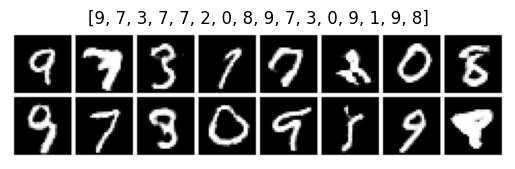

average prediction confidence over 1000 predictions: 0.623302161693573
cumulative prediction counts: [7024, 3491, 6386, 9027, 3277, 4840, 2104, 8229, 8218, 14404]
epoch time: 16.784632682800293, total time: 1150.5404644012451
Epoch [68/100] Batch [1/469] Discriminator Loss: 0.7622 Generator Loss: 1.9621
Epoch [68/100] Batch [101/469] Discriminator Loss: 0.7193 Generator Loss: 1.8608
Epoch [68/100] Batch [201/469] Discriminator Loss: 0.8159 Generator Loss: 1.5987
Epoch [68/100] Batch [301/469] Discriminator Loss: 0.7040 Generator Loss: 1.9244
Epoch [68/100] Batch [401/469] Discriminator Loss: 0.7625 Generator Loss: 1.3833


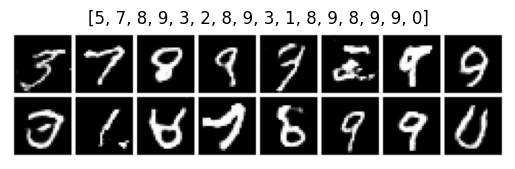

average prediction confidence over 1000 predictions: 0.6175646185874939
cumulative prediction counts: [7143, 3526, 6454, 9150, 3339, 4894, 2119, 8385, 8333, 14657]
epoch time: 16.578734397888184, total time: 1167.1191987991333
Epoch [69/100] Batch [1/469] Discriminator Loss: 0.8253 Generator Loss: 1.2931
Epoch [69/100] Batch [101/469] Discriminator Loss: 0.7352 Generator Loss: 1.3740
Epoch [69/100] Batch [201/469] Discriminator Loss: 0.7817 Generator Loss: 1.5876
Epoch [69/100] Batch [301/469] Discriminator Loss: 0.6449 Generator Loss: 2.1001
Epoch [69/100] Batch [401/469] Discriminator Loss: 0.9234 Generator Loss: 1.4114


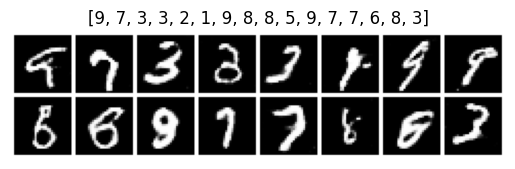

average prediction confidence over 1000 predictions: 0.6326815485954285
cumulative prediction counts: [7247, 3558, 6528, 9291, 3400, 4944, 2143, 8539, 8432, 14918]
epoch time: 17.506866693496704, total time: 1184.62606549263
Epoch [70/100] Batch [1/469] Discriminator Loss: 0.8082 Generator Loss: 1.7896
Epoch [70/100] Batch [101/469] Discriminator Loss: 0.6552 Generator Loss: 1.8132
Epoch [70/100] Batch [201/469] Discriminator Loss: 0.7102 Generator Loss: 1.6516
Epoch [70/100] Batch [301/469] Discriminator Loss: 0.7189 Generator Loss: 1.9770
Epoch [70/100] Batch [401/469] Discriminator Loss: 0.7626 Generator Loss: 1.3218


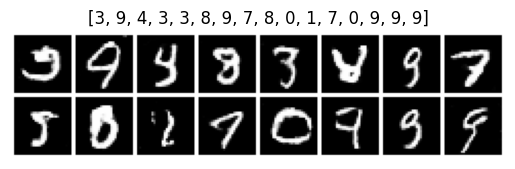

average prediction confidence over 1000 predictions: 0.617280900478363
cumulative prediction counts: [7353, 3585, 6596, 9422, 3461, 5009, 2170, 8706, 8532, 15166]
epoch time: 16.8964102268219, total time: 1201.522475719452
Epoch [71/100] Batch [1/469] Discriminator Loss: 0.8025 Generator Loss: 2.1766
Epoch [71/100] Batch [101/469] Discriminator Loss: 0.8015 Generator Loss: 2.2826
Epoch [71/100] Batch [201/469] Discriminator Loss: 0.8599 Generator Loss: 1.2257
Epoch [71/100] Batch [301/469] Discriminator Loss: 0.8030 Generator Loss: 2.0692
Epoch [71/100] Batch [401/469] Discriminator Loss: 0.5348 Generator Loss: 1.8231


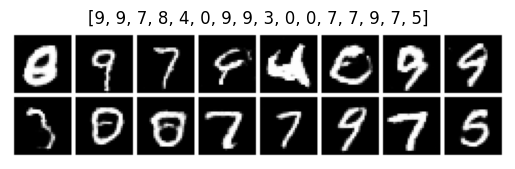

average prediction confidence over 1000 predictions: 0.6168580055236816
cumulative prediction counts: [7457, 3627, 6678, 9551, 3522, 5071, 2193, 8843, 8630, 15428]
epoch time: 17.081223487854004, total time: 1218.603699207306
Epoch [72/100] Batch [1/469] Discriminator Loss: 0.7063 Generator Loss: 1.8498
Epoch [72/100] Batch [101/469] Discriminator Loss: 0.8304 Generator Loss: 1.1495
Epoch [72/100] Batch [201/469] Discriminator Loss: 0.7710 Generator Loss: 1.5053
Epoch [72/100] Batch [301/469] Discriminator Loss: 0.7883 Generator Loss: 1.3597
Epoch [72/100] Batch [401/469] Discriminator Loss: 0.8641 Generator Loss: 1.4219


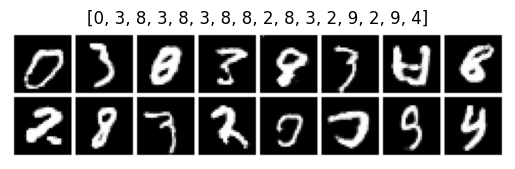

average prediction confidence over 1000 predictions: 0.6280737519264221
cumulative prediction counts: [7575, 3657, 6762, 9663, 3580, 5139, 2212, 8995, 8731, 15686]
epoch time: 17.27594828605652, total time: 1235.8796474933624
Epoch [73/100] Batch [1/469] Discriminator Loss: 0.8021 Generator Loss: 2.5870
Epoch [73/100] Batch [101/469] Discriminator Loss: 0.8602 Generator Loss: 2.7976
Epoch [73/100] Batch [201/469] Discriminator Loss: 0.7689 Generator Loss: 1.5590
Epoch [73/100] Batch [301/469] Discriminator Loss: 0.6702 Generator Loss: 1.4509
Epoch [73/100] Batch [401/469] Discriminator Loss: 0.7772 Generator Loss: 2.2302


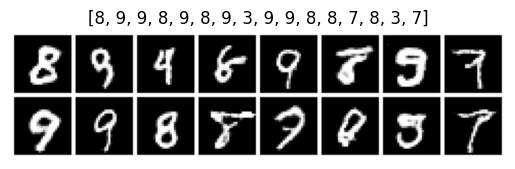

average prediction confidence over 1000 predictions: 0.6292005777359009
cumulative prediction counts: [7667, 3682, 6822, 9800, 3644, 5206, 2230, 9161, 8832, 15956]
epoch time: 16.859106063842773, total time: 1252.7387535572052
Epoch [74/100] Batch [1/469] Discriminator Loss: 0.6894 Generator Loss: 1.3078
Epoch [74/100] Batch [101/469] Discriminator Loss: 0.7133 Generator Loss: 2.0139
Epoch [74/100] Batch [201/469] Discriminator Loss: 0.7741 Generator Loss: 1.7196
Epoch [74/100] Batch [301/469] Discriminator Loss: 0.6751 Generator Loss: 1.5716
Epoch [74/100] Batch [401/469] Discriminator Loss: 0.6848 Generator Loss: 1.9887


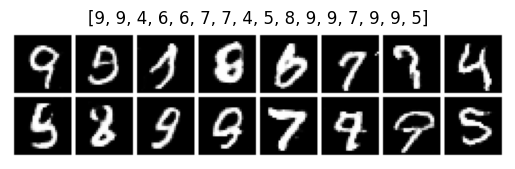

average prediction confidence over 1000 predictions: 0.6172453761100769
cumulative prediction counts: [7774, 3721, 6890, 9938, 3690, 5259, 2253, 9331, 8926, 16218]
epoch time: 17.235450506210327, total time: 1269.9742040634155
Epoch [75/100] Batch [1/469] Discriminator Loss: 0.7849 Generator Loss: 1.3781
Epoch [75/100] Batch [101/469] Discriminator Loss: 0.7079 Generator Loss: 1.7114
Epoch [75/100] Batch [201/469] Discriminator Loss: 0.8244 Generator Loss: 1.1766
Epoch [75/100] Batch [301/469] Discriminator Loss: 0.7081 Generator Loss: 1.4704
Epoch [75/100] Batch [401/469] Discriminator Loss: 0.7104 Generator Loss: 1.4720


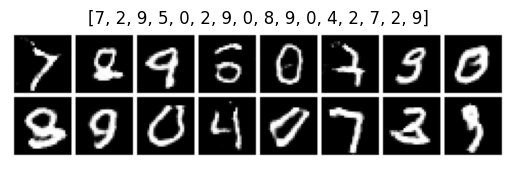

average prediction confidence over 1000 predictions: 0.6256416440010071
cumulative prediction counts: [7882, 3751, 6965, 10054, 3741, 5318, 2282, 9505, 9026, 16476]
epoch time: 16.453718423843384, total time: 1286.427922487259
Epoch [76/100] Batch [1/469] Discriminator Loss: 0.7575 Generator Loss: 2.1271
Epoch [76/100] Batch [101/469] Discriminator Loss: 0.7565 Generator Loss: 1.2953
Epoch [76/100] Batch [201/469] Discriminator Loss: 0.7783 Generator Loss: 1.5079
Epoch [76/100] Batch [301/469] Discriminator Loss: 0.6425 Generator Loss: 1.7911
Epoch [76/100] Batch [401/469] Discriminator Loss: 0.6900 Generator Loss: 1.4993


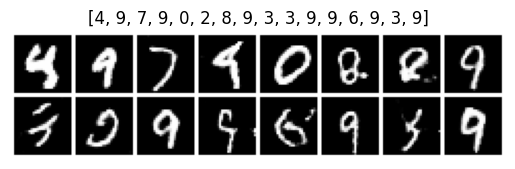

average prediction confidence over 1000 predictions: 0.6363558769226074
cumulative prediction counts: [7985, 3780, 7035, 10190, 3803, 5381, 2309, 9649, 9124, 16744]
epoch time: 16.874671697616577, total time: 1303.3025941848755
Epoch [77/100] Batch [1/469] Discriminator Loss: 0.7374 Generator Loss: 2.0477
Epoch [77/100] Batch [101/469] Discriminator Loss: 0.7045 Generator Loss: 2.3123
Epoch [77/100] Batch [201/469] Discriminator Loss: 0.7668 Generator Loss: 2.3266
Epoch [77/100] Batch [301/469] Discriminator Loss: 0.6934 Generator Loss: 2.1608
Epoch [77/100] Batch [401/469] Discriminator Loss: 0.7077 Generator Loss: 1.9813


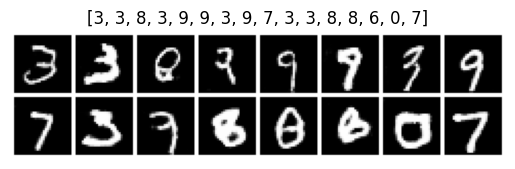

average prediction confidence over 1000 predictions: 0.6337034106254578
cumulative prediction counts: [8094, 3807, 7098, 10315, 3868, 5425, 2340, 9817, 9231, 17005]
epoch time: 17.53286099433899, total time: 1320.8354551792145
Epoch [78/100] Batch [1/469] Discriminator Loss: 0.6854 Generator Loss: 1.6712
Epoch [78/100] Batch [101/469] Discriminator Loss: 0.7904 Generator Loss: 1.4843
Epoch [78/100] Batch [201/469] Discriminator Loss: 0.7660 Generator Loss: 1.6071
Epoch [78/100] Batch [301/469] Discriminator Loss: 0.8310 Generator Loss: 2.4974
Epoch [78/100] Batch [401/469] Discriminator Loss: 0.7571 Generator Loss: 1.3792


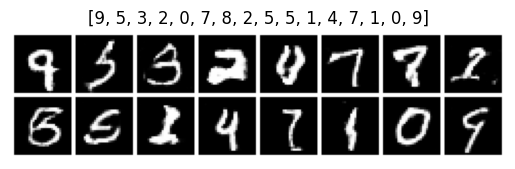

average prediction confidence over 1000 predictions: 0.6228435635566711
cumulative prediction counts: [8201, 3846, 7174, 10442, 3928, 5481, 2366, 9985, 9338, 17239]
epoch time: 16.936241388320923, total time: 1337.7716965675354
Epoch [79/100] Batch [1/469] Discriminator Loss: 0.8199 Generator Loss: 2.0974
Epoch [79/100] Batch [101/469] Discriminator Loss: 0.6633 Generator Loss: 2.2609
Epoch [79/100] Batch [201/469] Discriminator Loss: 0.7769 Generator Loss: 1.3649
Epoch [79/100] Batch [301/469] Discriminator Loss: 0.7716 Generator Loss: 2.8719
Epoch [79/100] Batch [401/469] Discriminator Loss: 0.7082 Generator Loss: 1.7874


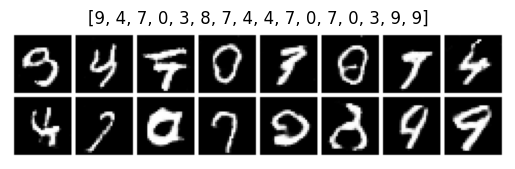

average prediction confidence over 1000 predictions: 0.6253497004508972
cumulative prediction counts: [8315, 3872, 7239, 10557, 3986, 5531, 2387, 10156, 9453, 17504]
epoch time: 16.813851833343506, total time: 1354.585548400879
Epoch [80/100] Batch [1/469] Discriminator Loss: 0.7911 Generator Loss: 2.1283
Epoch [80/100] Batch [101/469] Discriminator Loss: 0.6400 Generator Loss: 2.0181
Epoch [80/100] Batch [201/469] Discriminator Loss: 0.6837 Generator Loss: 1.5401
Epoch [80/100] Batch [301/469] Discriminator Loss: 0.7569 Generator Loss: 2.6164
Epoch [80/100] Batch [401/469] Discriminator Loss: 0.6048 Generator Loss: 1.1760


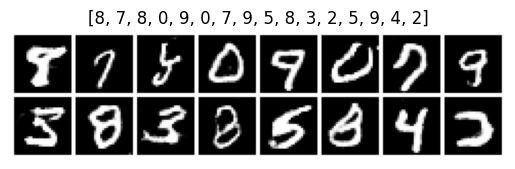

average prediction confidence over 1000 predictions: 0.6280736327171326
cumulative prediction counts: [8412, 3893, 7309, 10706, 4036, 5589, 2414, 10342, 9551, 17748]
epoch time: 16.88524603843689, total time: 1371.4707944393158
Epoch [81/100] Batch [1/469] Discriminator Loss: 0.7036 Generator Loss: 1.7522
Epoch [81/100] Batch [101/469] Discriminator Loss: 0.6108 Generator Loss: 2.5373
Epoch [81/100] Batch [201/469] Discriminator Loss: 0.7297 Generator Loss: 1.4506
Epoch [81/100] Batch [301/469] Discriminator Loss: 0.7280 Generator Loss: 2.3620
Epoch [81/100] Batch [401/469] Discriminator Loss: 0.7750 Generator Loss: 2.1159


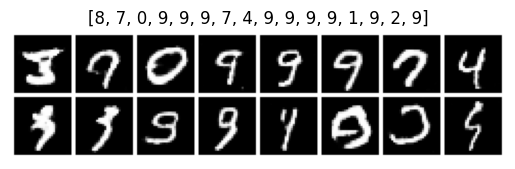

average prediction confidence over 1000 predictions: 0.6356392502784729
cumulative prediction counts: [8513, 3917, 7377, 10837, 4085, 5641, 2441, 10531, 9653, 18005]
epoch time: 16.833862781524658, total time: 1388.3046572208405
Epoch [82/100] Batch [1/469] Discriminator Loss: 0.5757 Generator Loss: 2.1640
Epoch [82/100] Batch [101/469] Discriminator Loss: 0.7393 Generator Loss: 1.5305
Epoch [82/100] Batch [201/469] Discriminator Loss: 0.5936 Generator Loss: 1.9074
Epoch [82/100] Batch [301/469] Discriminator Loss: 0.7364 Generator Loss: 1.3766
Epoch [82/100] Batch [401/469] Discriminator Loss: 0.7638 Generator Loss: 2.0976


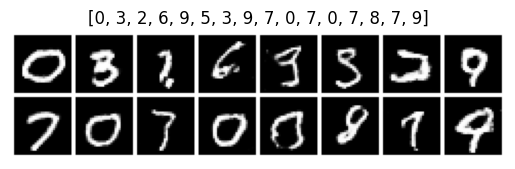

average prediction confidence over 1000 predictions: 0.6217939853668213
cumulative prediction counts: [8634, 3936, 7445, 10963, 4134, 5700, 2464, 10705, 9764, 18255]
epoch time: 17.671610593795776, total time: 1405.9762678146362
Epoch [83/100] Batch [1/469] Discriminator Loss: 0.7692 Generator Loss: 1.3468
Epoch [83/100] Batch [101/469] Discriminator Loss: 0.6948 Generator Loss: 2.3225
Epoch [83/100] Batch [201/469] Discriminator Loss: 0.7151 Generator Loss: 1.9375
Epoch [83/100] Batch [301/469] Discriminator Loss: 0.7466 Generator Loss: 1.6811
Epoch [83/100] Batch [401/469] Discriminator Loss: 0.6702 Generator Loss: 1.7135


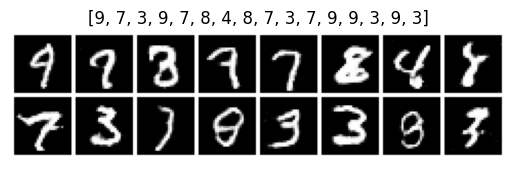

average prediction confidence over 1000 predictions: 0.6375505328178406
cumulative prediction counts: [8749, 3964, 7523, 11090, 4196, 5751, 2486, 10873, 9839, 18529]
epoch time: 16.855531215667725, total time: 1422.831799030304
Epoch [84/100] Batch [1/469] Discriminator Loss: 0.6471 Generator Loss: 1.6262
Epoch [84/100] Batch [101/469] Discriminator Loss: 0.7694 Generator Loss: 2.4821
Epoch [84/100] Batch [201/469] Discriminator Loss: 0.6698 Generator Loss: 1.8837
Epoch [84/100] Batch [301/469] Discriminator Loss: 0.7882 Generator Loss: 1.4614
Epoch [84/100] Batch [401/469] Discriminator Loss: 0.7676 Generator Loss: 1.3251


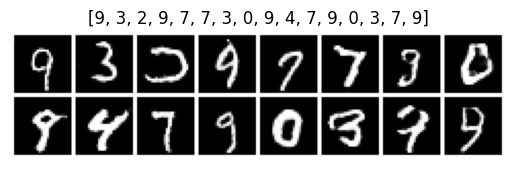

average prediction confidence over 1000 predictions: 0.6259958148002625
cumulative prediction counts: [8864, 3995, 7583, 11225, 4260, 5805, 2509, 11049, 9954, 18756]
epoch time: 16.66751980781555, total time: 1439.4993188381195
Epoch [85/100] Batch [1/469] Discriminator Loss: 0.7493 Generator Loss: 2.3720
Epoch [85/100] Batch [101/469] Discriminator Loss: 0.6676 Generator Loss: 1.4605
Epoch [85/100] Batch [201/469] Discriminator Loss: 0.6943 Generator Loss: 2.3472
Epoch [85/100] Batch [301/469] Discriminator Loss: 0.6248 Generator Loss: 1.9970
Epoch [85/100] Batch [401/469] Discriminator Loss: 0.7484 Generator Loss: 2.2531


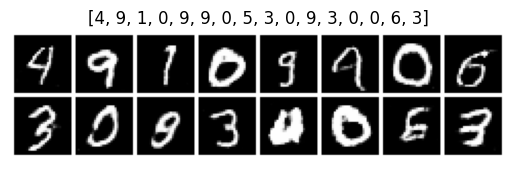

average prediction confidence over 1000 predictions: 0.6253644227981567
cumulative prediction counts: [8976, 4020, 7667, 11343, 4318, 5863, 2533, 11230, 10051, 18999]
epoch time: 17.08368468284607, total time: 1456.5830035209656
Epoch [86/100] Batch [1/469] Discriminator Loss: 0.7488 Generator Loss: 2.2652
Epoch [86/100] Batch [101/469] Discriminator Loss: 0.7218 Generator Loss: 2.2189
Epoch [86/100] Batch [201/469] Discriminator Loss: 0.9141 Generator Loss: 1.8306
Epoch [86/100] Batch [301/469] Discriminator Loss: 0.7275 Generator Loss: 2.4489
Epoch [86/100] Batch [401/469] Discriminator Loss: 0.6490 Generator Loss: 2.0692


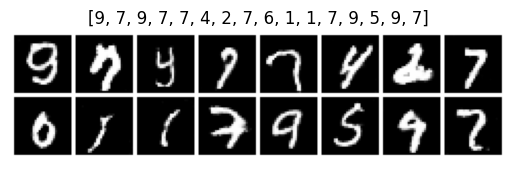

average prediction confidence over 1000 predictions: 0.6315218806266785
cumulative prediction counts: [9078, 4047, 7742, 11470, 4396, 5912, 2555, 11402, 10147, 19251]
epoch time: 16.658501863479614, total time: 1473.2415053844452
Epoch [87/100] Batch [1/469] Discriminator Loss: 0.7793 Generator Loss: 2.1426
Epoch [87/100] Batch [101/469] Discriminator Loss: 0.7095 Generator Loss: 2.3949
Epoch [87/100] Batch [201/469] Discriminator Loss: 0.6198 Generator Loss: 2.0264
Epoch [87/100] Batch [301/469] Discriminator Loss: 0.8481 Generator Loss: 1.9768
Epoch [87/100] Batch [401/469] Discriminator Loss: 0.6142 Generator Loss: 2.2974


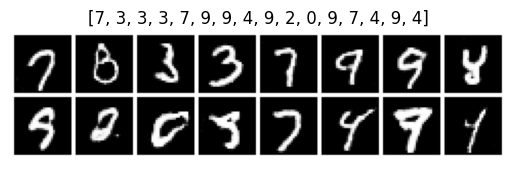

average prediction confidence over 1000 predictions: 0.6273245215415955
cumulative prediction counts: [9188, 4073, 7807, 11585, 4465, 5979, 2579, 11562, 10241, 19521]
epoch time: 17.533067226409912, total time: 1490.774572610855
Epoch [88/100] Batch [1/469] Discriminator Loss: 0.7109 Generator Loss: 2.0189
Epoch [88/100] Batch [101/469] Discriminator Loss: 0.7960 Generator Loss: 1.4655
Epoch [88/100] Batch [201/469] Discriminator Loss: 0.8381 Generator Loss: 1.3725
Epoch [88/100] Batch [301/469] Discriminator Loss: 0.5811 Generator Loss: 1.7353
Epoch [88/100] Batch [401/469] Discriminator Loss: 0.7636 Generator Loss: 2.2923


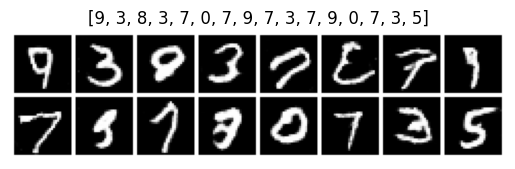

average prediction confidence over 1000 predictions: 0.6349877119064331
cumulative prediction counts: [9301, 4100, 7890, 11716, 4526, 6028, 2597, 11745, 10343, 19754]
epoch time: 16.928141832351685, total time: 1507.7027144432068
Epoch [89/100] Batch [1/469] Discriminator Loss: 0.7027 Generator Loss: 1.7920
Epoch [89/100] Batch [101/469] Discriminator Loss: 0.7149 Generator Loss: 2.4198
Epoch [89/100] Batch [201/469] Discriminator Loss: 0.9136 Generator Loss: 3.3008
Epoch [89/100] Batch [301/469] Discriminator Loss: 0.6674 Generator Loss: 2.1813
Epoch [89/100] Batch [401/469] Discriminator Loss: 0.7017 Generator Loss: 2.0983


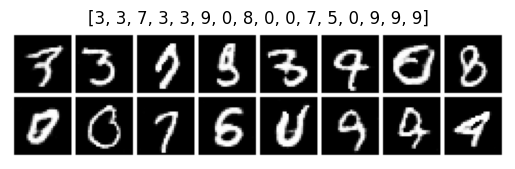

average prediction confidence over 1000 predictions: 0.6323339939117432
cumulative prediction counts: [9400, 4129, 7947, 11847, 4599, 6082, 2615, 11922, 10429, 20030]
epoch time: 16.79380226135254, total time: 1524.4965167045593
Epoch [90/100] Batch [1/469] Discriminator Loss: 0.7462 Generator Loss: 2.2608
Epoch [90/100] Batch [101/469] Discriminator Loss: 0.8504 Generator Loss: 2.3760
Epoch [90/100] Batch [201/469] Discriminator Loss: 0.7032 Generator Loss: 1.7531
Epoch [90/100] Batch [301/469] Discriminator Loss: 0.6774 Generator Loss: 2.2432
Epoch [90/100] Batch [401/469] Discriminator Loss: 0.7466 Generator Loss: 2.8686


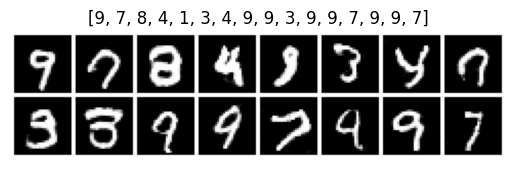

average prediction confidence over 1000 predictions: 0.627032458782196
cumulative prediction counts: [9518, 4164, 8011, 11978, 4658, 6145, 2644, 12097, 10515, 20270]
epoch time: 17.2355375289917, total time: 1541.732054233551
Epoch [91/100] Batch [1/469] Discriminator Loss: 0.7845 Generator Loss: 1.6744
Epoch [91/100] Batch [101/469] Discriminator Loss: 0.7295 Generator Loss: 1.6306
Epoch [91/100] Batch [201/469] Discriminator Loss: 0.6877 Generator Loss: 2.4702
Epoch [91/100] Batch [301/469] Discriminator Loss: 0.6445 Generator Loss: 1.7520
Epoch [91/100] Batch [401/469] Discriminator Loss: 0.6541 Generator Loss: 2.1081


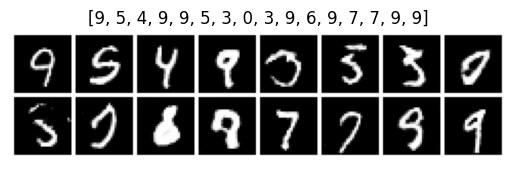

average prediction confidence over 1000 predictions: 0.6335993409156799
cumulative prediction counts: [9623, 4196, 8066, 12096, 4709, 6197, 2663, 12279, 10625, 20546]
epoch time: 16.386257648468018, total time: 1558.118311882019
Epoch [92/100] Batch [1/469] Discriminator Loss: 0.6441 Generator Loss: 2.5134
Epoch [92/100] Batch [101/469] Discriminator Loss: 0.6831 Generator Loss: 1.8507
Epoch [92/100] Batch [201/469] Discriminator Loss: 0.7414 Generator Loss: 2.2459
Epoch [92/100] Batch [301/469] Discriminator Loss: 0.5801 Generator Loss: 1.9085
Epoch [92/100] Batch [401/469] Discriminator Loss: 0.7248 Generator Loss: 2.4554


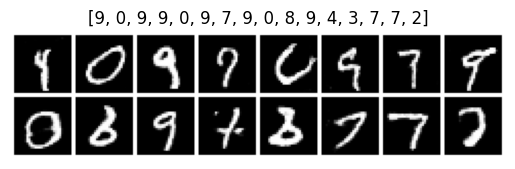

average prediction confidence over 1000 predictions: 0.6368922591209412
cumulative prediction counts: [9733, 4226, 8123, 12226, 4770, 6261, 2684, 12468, 10724, 20785]
epoch time: 16.38376808166504, total time: 1574.502079963684
Epoch [93/100] Batch [1/469] Discriminator Loss: 0.7924 Generator Loss: 1.4707
Epoch [93/100] Batch [101/469] Discriminator Loss: 0.6985 Generator Loss: 2.4563
Epoch [93/100] Batch [201/469] Discriminator Loss: 0.7797 Generator Loss: 2.4588
Epoch [93/100] Batch [301/469] Discriminator Loss: 0.6632 Generator Loss: 2.5909
Epoch [93/100] Batch [401/469] Discriminator Loss: 0.7101 Generator Loss: 2.9927


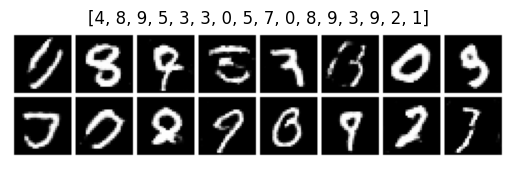

average prediction confidence over 1000 predictions: 0.6354916095733643
cumulative prediction counts: [9830, 4257, 8184, 12330, 4838, 6314, 2706, 12647, 10822, 21072]
epoch time: 17.359647274017334, total time: 1591.8617272377014
Epoch [94/100] Batch [1/469] Discriminator Loss: 0.6616 Generator Loss: 2.3461
Epoch [94/100] Batch [101/469] Discriminator Loss: 0.7504 Generator Loss: 2.6891
Epoch [94/100] Batch [201/469] Discriminator Loss: 0.6461 Generator Loss: 1.7377
Epoch [94/100] Batch [301/469] Discriminator Loss: 0.6416 Generator Loss: 2.0332
Epoch [94/100] Batch [401/469] Discriminator Loss: 0.6293 Generator Loss: 1.8464


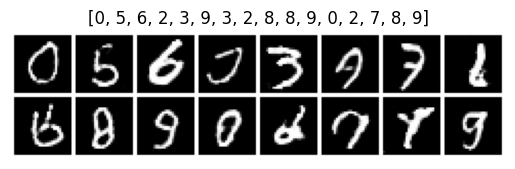

average prediction confidence over 1000 predictions: 0.6473855376243591
cumulative prediction counts: [9951, 4271, 8245, 12452, 4896, 6365, 2729, 12804, 10929, 21358]
epoch time: 16.702089548110962, total time: 1608.5638167858124
Epoch [95/100] Batch [1/469] Discriminator Loss: 0.8153 Generator Loss: 3.4362
Epoch [95/100] Batch [101/469] Discriminator Loss: 0.6872 Generator Loss: 1.6255
Epoch [95/100] Batch [201/469] Discriminator Loss: 0.7644 Generator Loss: 1.2652
Epoch [95/100] Batch [301/469] Discriminator Loss: 0.7504 Generator Loss: 2.6084
Epoch [95/100] Batch [401/469] Discriminator Loss: 0.7327 Generator Loss: 2.1229


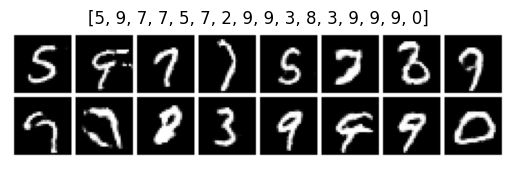

average prediction confidence over 1000 predictions: 0.6316645741462708
cumulative prediction counts: [10065, 4296, 8312, 12583, 4956, 6420, 2759, 12976, 11023, 21610]
epoch time: 17.47079849243164, total time: 1626.034615278244
Epoch [96/100] Batch [1/469] Discriminator Loss: 0.6703 Generator Loss: 1.8432
Epoch [96/100] Batch [101/469] Discriminator Loss: 0.6522 Generator Loss: 1.7827
Epoch [96/100] Batch [201/469] Discriminator Loss: 0.6293 Generator Loss: 1.4001
Epoch [96/100] Batch [301/469] Discriminator Loss: 0.7430 Generator Loss: 1.6208
Epoch [96/100] Batch [401/469] Discriminator Loss: 0.6004 Generator Loss: 1.6774


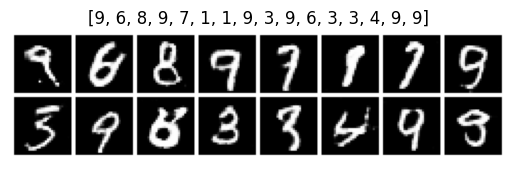

average prediction confidence over 1000 predictions: 0.6408833861351013
cumulative prediction counts: [10164, 4317, 8368, 12699, 5014, 6495, 2781, 13158, 11125, 21879]
epoch time: 16.69284963607788, total time: 1642.727464914322
Epoch [97/100] Batch [1/469] Discriminator Loss: 0.7422 Generator Loss: 2.3846
Epoch [97/100] Batch [101/469] Discriminator Loss: 0.6451 Generator Loss: 1.3557
Epoch [97/100] Batch [201/469] Discriminator Loss: 0.6634 Generator Loss: 2.0587
Epoch [97/100] Batch [301/469] Discriminator Loss: 0.7681 Generator Loss: 1.6280
Epoch [97/100] Batch [401/469] Discriminator Loss: 0.6916 Generator Loss: 2.6905


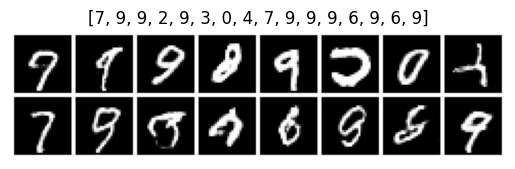

average prediction confidence over 1000 predictions: 0.6368842720985413
cumulative prediction counts: [10259, 4349, 8423, 12817, 5075, 6545, 2806, 13360, 11208, 22158]
epoch time: 16.8477783203125, total time: 1659.5752432346344
Epoch [98/100] Batch [1/469] Discriminator Loss: 0.5514 Generator Loss: 2.1160
Epoch [98/100] Batch [101/469] Discriminator Loss: 0.6927 Generator Loss: 2.1848
Epoch [98/100] Batch [201/469] Discriminator Loss: 0.9508 Generator Loss: 2.9885
Epoch [98/100] Batch [301/469] Discriminator Loss: 0.6866 Generator Loss: 3.0013
Epoch [98/100] Batch [401/469] Discriminator Loss: 0.6977 Generator Loss: 2.4629


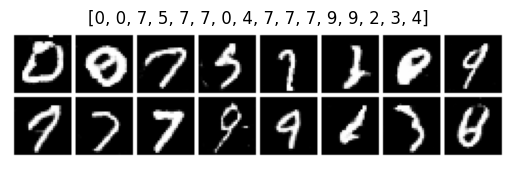

average prediction confidence over 1000 predictions: 0.6299602389335632
cumulative prediction counts: [10371, 4372, 8500, 12941, 5132, 6605, 2829, 13551, 11285, 22414]
epoch time: 17.61404585838318, total time: 1677.1892890930176
Epoch [99/100] Batch [1/469] Discriminator Loss: 0.7259 Generator Loss: 2.6719
Epoch [99/100] Batch [101/469] Discriminator Loss: 0.8803 Generator Loss: 2.4045
Epoch [99/100] Batch [201/469] Discriminator Loss: 0.7658 Generator Loss: 2.2949
Epoch [99/100] Batch [301/469] Discriminator Loss: 0.7679 Generator Loss: 2.2817
Epoch [99/100] Batch [401/469] Discriminator Loss: 0.7609 Generator Loss: 2.4239


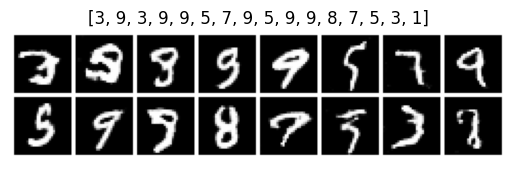

average prediction confidence over 1000 predictions: 0.6421520113945007
cumulative prediction counts: [10472, 4398, 8560, 13074, 5194, 6666, 2852, 13730, 11373, 22681]
epoch time: 16.69001340866089, total time: 1693.8793025016785
Epoch [100/100] Batch [1/469] Discriminator Loss: 0.6913 Generator Loss: 2.0802
Epoch [100/100] Batch [101/469] Discriminator Loss: 0.7059 Generator Loss: 2.5075
Epoch [100/100] Batch [201/469] Discriminator Loss: 0.6272 Generator Loss: 1.6574
Epoch [100/100] Batch [301/469] Discriminator Loss: 0.6319 Generator Loss: 1.9370
Epoch [100/100] Batch [401/469] Discriminator Loss: 0.7004 Generator Loss: 1.6188


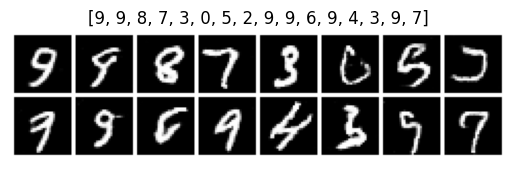

average prediction confidence over 1000 predictions: 0.6439846754074097
cumulative prediction counts: [10578, 4424, 8619, 13191, 5248, 6716, 2877, 13922, 11467, 22958]
epoch time: 16.918519735336304, total time: 1710.7978222370148


In [4]:
#OK now we have a good model for analyzing the output from our GAN
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set random seed for reproducibility
#torch.manual_seed(42)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.fc = nn.Linear(100, 7 * 7 * 128)
        self.conv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1)

        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 128, 7, 7)
        x = self.relu(self.conv1(x))
        x = self.tanh(self.conv2(x))
        return x

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.conv1 = nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.fc = nn.Linear(7 * 7 * 128, 1)

        self.relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = x.view(-1, 7 * 7 * 128)
        x = self.sigmoid(self.fc(x))
        return x

# Instantiate the generator and discriminator networks
generator = Generator()
discriminator = Discriminator()

# Define the loss function and optimizer
criterion = nn.BCELoss()
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Load the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Define the number of epochs and the device to use
num_epochs = 100
device = torch.device('cuda')

# Move the generator and discriminator networks to the device
generator.to(device)
discriminator.to(device)

# average of all confidences of predictions per epoch
confidences = []
counts = [0]*10
# Train the generator and discriminator networks
time_total = 0
for epoch in range(num_epochs):
    time_epoch = 0
    start = time.time()
    for i, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.shape[0]
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # Train the discriminator network
        discriminator_optimizer.zero_grad()
        real_images = real_images.to(device)
        real_outputs = discriminator(real_images)
        real_loss = criterion(real_outputs, real_labels)

        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images.detach())
        fake_loss = criterion(fake_outputs, fake_labels)

        discriminator_loss = real_loss + fake_loss
        discriminator_loss.backward()
        discriminator_optimizer.step()

        # Train the generator network
        generator_optimizer.zero_grad()
        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images)
        generator_loss = criterion(fake_outputs, real_labels)
        generator_loss.backward()
        generator_optimizer.step()

        # Print the loss statistics
        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] Batch [{i+1}/{len(dataloader)}] '
                  f'Discriminator Loss: {discriminator_loss.item():.4f} '
                  f'Generator Loss: {generator_loss.item():.4f}')

    # Generate 100 samples and count how many of each digit 
    with torch.no_grad():
        # Define the fixed noise vector for generating samples
        sample_noise = torch.randn(1000, 100, device=device)
        generated_images = generator(sample_noise)
        generated_images = 0.5 * (generated_images + 1)
        output = model(generated_images)
        pred = output.argmax(dim=1, keepdim=True)
        grid = make_grid(generated_images[:16].cpu(), nrow=8, pad_value=1)
        plt.imshow(grid.permute(1, 2, 0))
        plt.axis('off')
        plt.title([int(pred[x]) for x in range(16)])
        plt.show()
        #print(torch.exp(output[0])) # torch.exp converts the output back into regular softmax probabilities (confidences)
        avg_conf = torch.mean(torch.exp(output).max(dim=1).values)
        confidences.append(avg_conf)
        for p in pred:
            counts[p] += 1

    time_epoch = time.time() - start
    time_total += time_epoch
    print(f"average prediction confidence over 1000 predictions: {avg_conf}")
    print(f"cumulative prediction counts: {counts}")
    print(f"epoch time: {time_epoch}, total time: {time_total}")
       

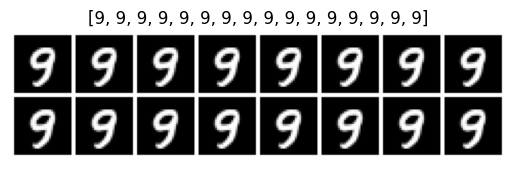

In [5]:
sample_noise = torch.zeros(1000, 100, device=device)
generated_images = generator(sample_noise)
generated_images = 0.5 * (generated_images + 1)
output = model(generated_images)
pred = output.argmax(dim=1, keepdim=True)
grid = make_grid(generated_images[:16].cpu(), nrow=8, pad_value=1)
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.title([int(pred[x]) for x in range(16)])
plt.show()
#print(torch.exp(output[0])) # torch.exp converts the output back into regular softmax probabilities (confidences)
avg_conf = torch.mean(torch.exp(output).max(dim=1).values)

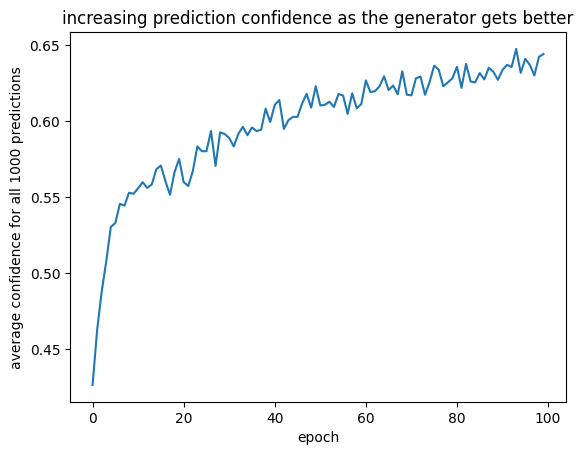

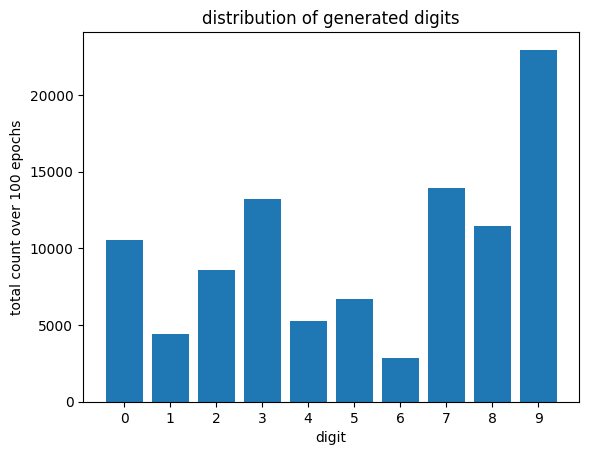

In [6]:
# now let's plot the average confidences in the predictions over the epochs
import matplotlib.pyplot as plt
plt.plot([float(c) for c in confidences])
plt.xlabel("epoch")
plt.ylabel("average confidence for all 1000 predictions")
plt.title("increasing prediction confidence as the generator gets better")
plt.show()

plt.bar([f"{x}" for x in range(10)], counts)
plt.xlabel("digit")
plt.ylabel("total count over 100 epochs")
plt.title("distribution of generated digits")
plt.show()